# Studi Kasus Pertama : Predictive Analytics

## Data Loading

Supaya isi dataset lebih mudah dipahami, kita perlu melakukan proses loading data terlebih dahulu. Jangan lupa import library pandas untuk dapat membaca file datanya. Di sini, kita membaca data langsung dari url sumber data di [repository GitHub ggplot](https://github.com/tidyverse/ggplot2/tree/master/data-raw). Dataset yang akan kita gunakan bernama diamonds.csv.

Selain cara di atas, terdapat beberapa cara lain untuk membaca dataset. Jika kita memiliki file dataset dalam komputer atau local machine, kita bisa upload dataset tersebut langsung ke file storage di Google Colab. Jika menggunakan tools lain atau mengunggah data ke Google Drive, pastikan Anda menyesuaikan path datanya ya.

Pertama, import library yang dibutuhkan. Anda dapat melakukannya di awal, atau di tiap kode sel.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Kemudian, tuliskan kode berikut.

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Output kode di atas memberikan informasi sebagai berikut:
*   Ada 53.940 baris (records atau jumlah pengamatan) dalam dataset.
*   Terdapat 10 kolom yaitu: carat, cut, color, clarity, depth, table, price, x, y, z.



---



## Exploratory Data Analysis - Deskripsi Variabel

Deskripsi Variabel
Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/shivam2503/diamonds), variabel-variabel pada Diamond dataset adalah sebagai berikut:
* Harga dalam dolar Amerika Serikat ($) adalah fitur target. 
* carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
* cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
* color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
* clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
* x: merepresentasikan panjang diamonds dalam mm (0-10.74).
* y: merepresentasikan lebar diamonds dalam mm (0-58.9).
* z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
* depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
* table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

Setelah memahami deskripsi variabel pada data, langkah selanjutnya adalah mengecek informasi pada dataset dengan fungsi `info()` berikut.

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Dari output terlihat bahwa:

*  Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
*  Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
*  Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

Uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya, Anda perlu mengecek deskripsi statistik data dengan fitur `describe()`.

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

*  Count  adalah jumlah sampel pada data.
*  Mean adalah nilai rata-rata.
*  Std adalah standar deviasi.
*  Min yaitu nilai minimum setiap kolom. 
*  25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
*  50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*  75% adalah kuartil ketiga.
*  Max adalah nilai maksimum.



---



## Exploratory Data Analysis - Menangani Missing Value & Outliers

### Menangani Missing Value

Dari hasil fungsi `describe()`, nilai minimum untuk kolom x, y, dan z adalah 0. Seperti kita tahu, x, y, dan z adalah ukuran panjang, lebar, dan kedalaman diamonds sehingga tidak mungkin ada diamonds dengan dimensi x, y, atau z bernilai 0. Kita patut menduga bahwa ini merupakan data yang tidak valid atau sering disebut missing value. Mari kita cek ada berapa missing value pada kolom x, y, dan z.

In [ ]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()
 
print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


Selanjutnya, mari kita cek, apakah data bernilai 0 pada salah satu dimensi juga terdapat pada dimensi lain? Kita cek dari kolom z yang memiliki jumlah missing value terbanyak.

In [ ]:
diamonds.loc[(diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Data bernilai 0 pada dimensi x dan y juga memiliki nilai 0 pada dimensi z. Sekarang, kita perlu memutuskan apa yang akan kita lakukan terhadap data yang hilang ini. Ada beberapa teknik untuk mengatasi missing value, antara lain :
*  menghapus atau melakukan drop terhadap data yang hilang
*  menggantinya dengan *mean* atau *median*, serta memprediksi dan mengganti nilainya dengan teknik regresi [22](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/).

Setiap teknik tentu memiliki kelebihan dan kekurangan. Selain itu, penanganan missing value juga bersifat unik tergantung kasusnya. Pada kasus kita, 20 sampel missing value merupakan jumlah yang kecil jika dibandingkan dengan jumlah total sampel yaitu 53.940. Jika 20 sampel ini dihapus, tentu kita akan kehilangan beberapa informasi. Akan tetapi, ini tidak jadi masalah sebab kita masih memiliki 53.920 sampel lainnya. Oleh karena itu, mari kita hapus saja missing value ini.

In [ ]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

Setelah baris bernilai 0 dihapus, jumlah sampel atau baris data berubah menjadi **53.920**. Mari kita cek lagi dengan fungsi `describe()` untuk memastikan tidak ada nilai 0 lagi pada kolom x, y, dan z.

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Nilai minimum pada kolom x, y, dan z sudah bukan 0 lagi. Kita bisa lanjutkan ke tahapan selanjutnya yaitu menangani outliers. 

### Menangani Outliers

Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier. Menurut Kuhn dan Johnson dalam *Applied Predictive Modeling* [23](http://appliedpredictivemodeling.com/), **outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama**. **Ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya**. 

Ada beberapa teknik untuk menangani outliers, antara lain:

*  Visualisasi Data
*  Hypothesis Testing
*  Z-score method
*  IQR Method


Pada kasus ini, Anda akan mendeteksi dan menangani outliers dengan teknik visualisasi data dan *IQR method*. IQR adalah singkatan dari *Inter Quartile Range*. Untuk memahami apa itu IQR, mari kita ingat lagi konsep kuartil.

Kuartil dari suatu populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran.
*  Seperempat atau (25%) dari data berada di bawah kuartil pertama (Q1)
*  Setengah atau (50%) dari data berada di bawah kuartil kedua (Q2)
*  dan tiga perempat atau (75%) dari data berada di kuartil ketiga (Q3).
Dengan demikian interquartile range atau **IQR = Q3 - Q1**.

Sampai di sini, mari kita simpan dulu metode IQR. Anda akan menggunakannya nanti jika memang terbukti ada outliers pada dataset kita. Untuk mengeceknya, kita akan menggunakan teknik visualisasi, yaitu jenis **boxplot**.

Menurut Seltman dalam “Experimental Design and Analysis” [24](https://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf), boxplot menunjukkan ukuran lokasi dan penyebaran, serta memberikan informasi tentang simetri dan outliers. Boxplot bisa digambarkan secara vertikal maupun horizontal.

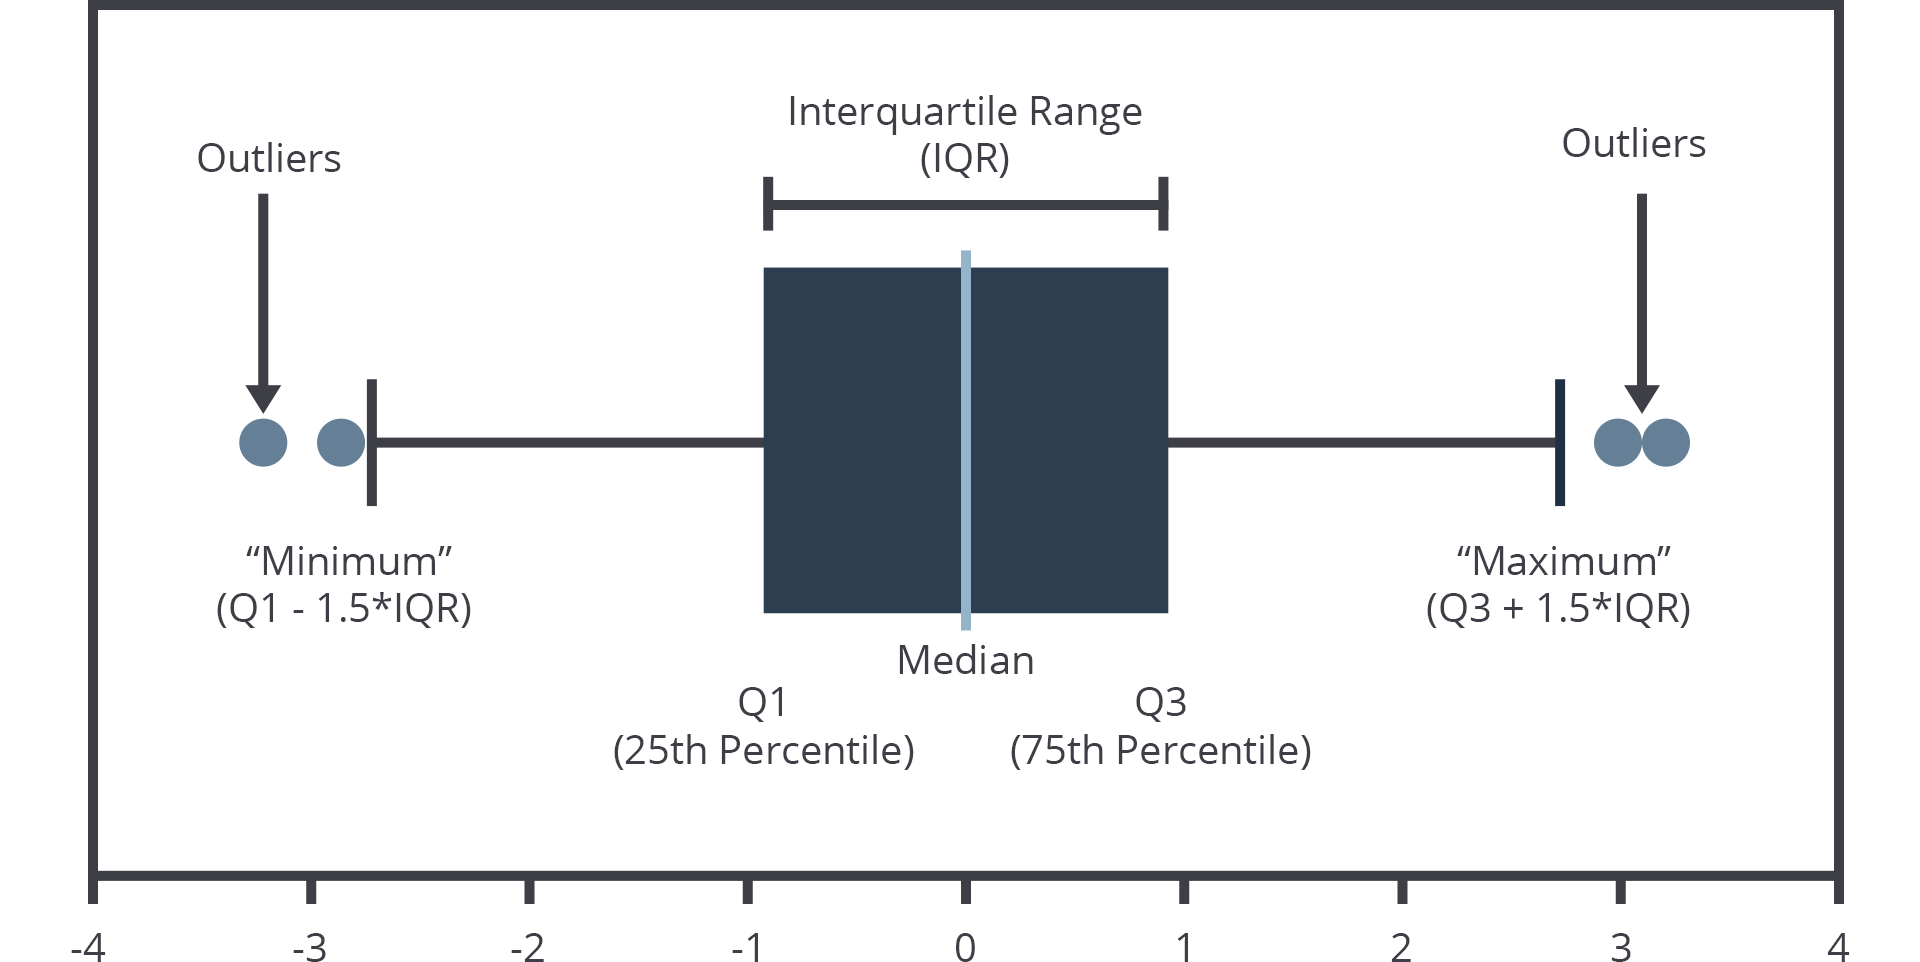

Sekarang, mari kita visualisasikan data Diamonds dengan **boxplot** untuk mendeteksi **outliers** pada beberapa fitur numerik. Anda dapat melakukan visualisasi pada fitur numerik sisanya. 

1. carat

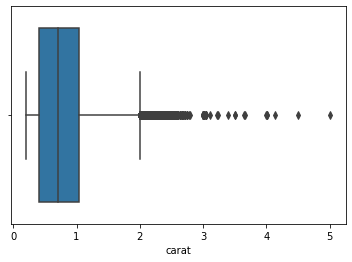

In [ ]:
sns.boxplot(x=diamonds['carat'])

2. Fitur table

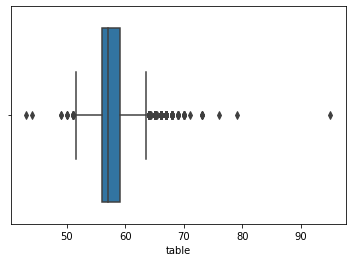

In [ ]:
sns.boxplot(x=diamonds['table'])

3. Fitur x

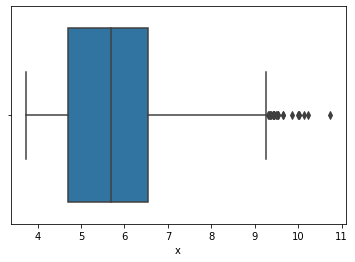

In [ ]:
sns.boxplot(x=diamonds['x'])

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas terdapat outliers. Tugas Anda selanjutnya adalah mengatasi outliers tersebut dengan metode yang telah kita bahas sebelumnya yaitu metode IQR. Anda akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier. 

Seltman dalam “Experimental Design and Analysis” [24] menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1. Jangan bingung dulu ya, kita akan bahas lebih detail.

Hal pertama yang perlu Anda lakukan adalah membuat batas bawah dan batas atas.

*  Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. 
*  Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3. Mudah bukan

Berikut persamaannya:

*  Batas bawah = Q1 - 1.5 * IQR

*  Batas atas = Q3 + 1.5 * IQR

Mari kita terapkan persamaan ini ke dalam code.

In [ ]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

(47524, 10)

Dataset Anda sekarang telah bersih dan memiliki 45.864 sampel.



---



## Exploratory Data Analysis - Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik **Univariate EDA**. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu *numerical features* dan *categorical features*.

In [ ]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

Lakukan analisis terhadap fitur kategori terlebih dahulu.

### Categorical Features
#### Fitur Cut

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


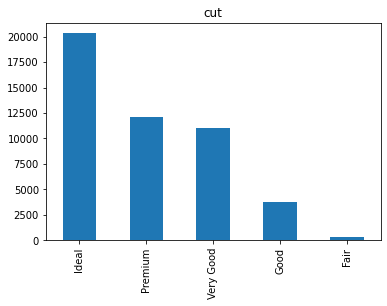

In [ ]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

### Categorical Features
#### Fitur Color
Selanjutnya, mari kita cek fitur ‘Color’.

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


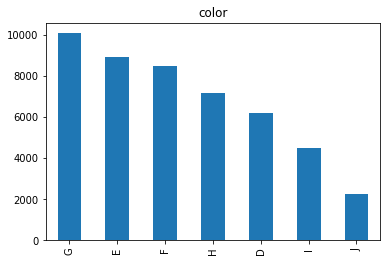

In [ ]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

### Categorical Features
#### Fitur Clarity
Dengan code yang sama untuk fitur clarity, hasil plotnya adalah sebagai berikut:

      jumlah sampel  persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


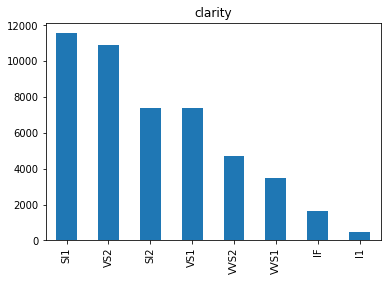

In [ ]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

1. 'IF' - Internally Flawless 
2. 'VVS2' - Very Very Slight Inclusions 
3. 'VVS1' - Very Very Slight Inclusions 
4. 'VS1' - Very Slight Inclusions
5. 'VS2' - Very Slight Inclusions
6. 'SI2' - Slight Inclusions
7. 'SI1' - Slight Inclusions
8. 'I1' - Imperfect

Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

### Numerical Features

Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya menggunakan code berikut.

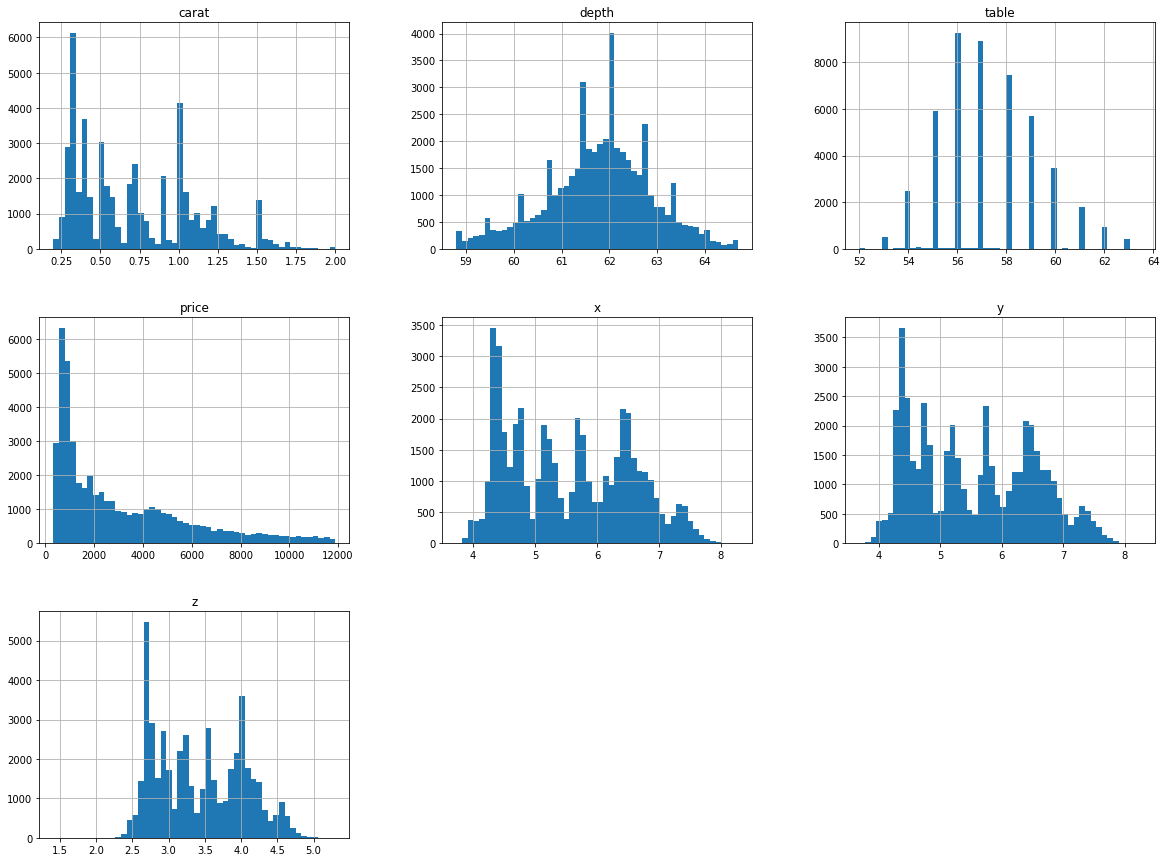

In [ ]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel **price** yang merupakan fitur target (label) pada data kita. Dari histogram **price**, kita bisa memperoleh beberapa informasi, antara lain:

* Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel.

* Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $1800.

* Setengah harga berlian bernilai di bawah $2500.

* Distribusi harga miring ke kanan *(right-skewed)*. Hal ini akan berimplikasi pada model.



---



## Exploratory Data Analysis - Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai **bivariate** EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

### Categorical Features

Pada tahap ini, kita akan mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

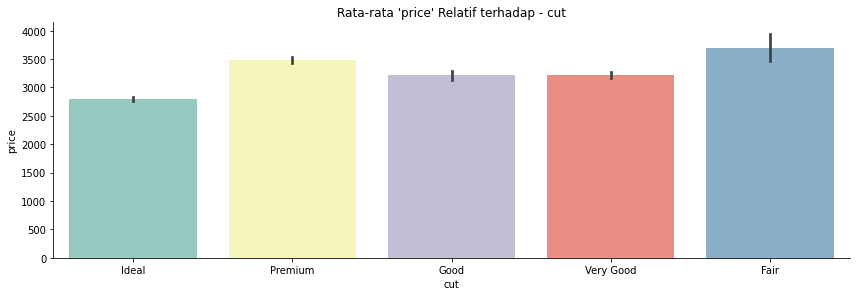

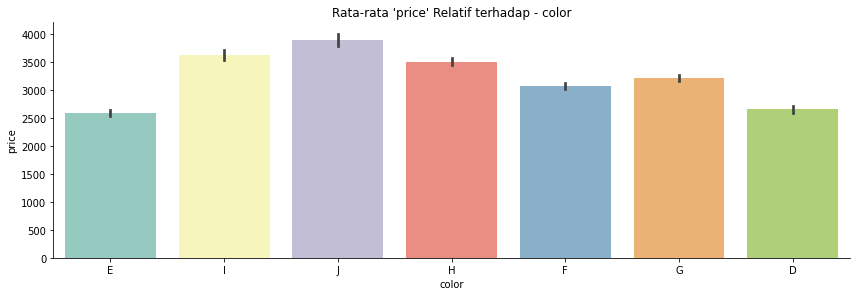

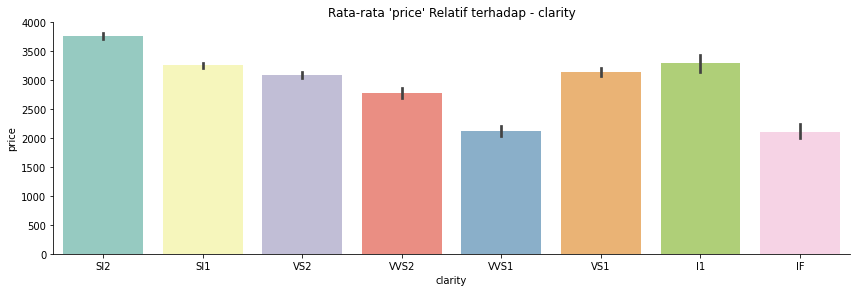

In [ ]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='price', kind='bar', dodge=False, height=4, aspect=3, data=diamonds, palette='Set3')
  plt.title("Rata-rata 'price' Relatif terhadap - {}". format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

* Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.

* Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.

* Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.

Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

### Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi `pairplot()`. Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi `corr()`. Tidak perlu menunggu lama, mari kita langsung analisis datanya.

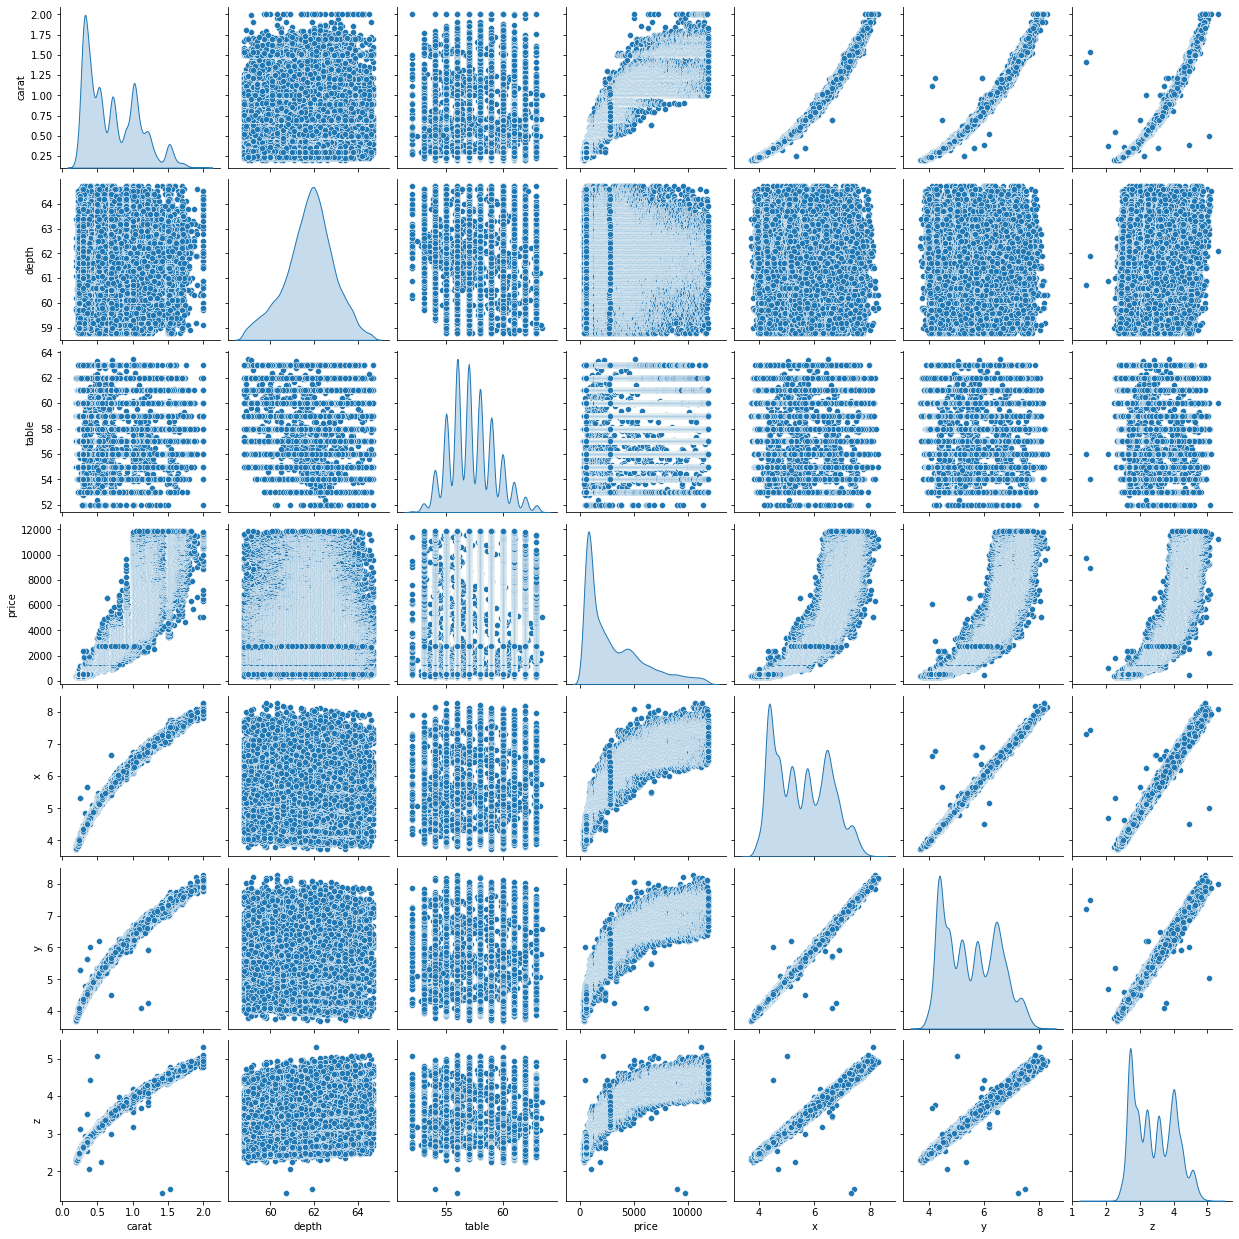

In [ ]:
# mengamati hubungan antara fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind='kde')

Fungsi pairplot dari library [seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html) menunjukkan relasi pasangan dalam dataset. Misalnya, relasi antara fitur ‘x’ pada sumbu x dengan fitur ‘z’ pada sumbu y atau relasi antara fitur ‘carat’ pada sumbu x dengan ‘price’ pada sumbu y. Dari grafik, kita dapat melihat plot relasi masing-masing fitur numerik pada dataset.

Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target kita yaitu ‘price’. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target ‘price’, dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur ‘price’ berada pada baris keempat (dari atas) sumbu y (ditandai oleh kotak merah). Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target ‘price’ pada baris tersebut saja. 

Sebelum memperhatikan pola sebaran data pada grafik pairplot di atas, mari kita pahami terlebih dahulu cara membaca korelasi pada sebaran data. Korelasi pada fitur tampak dari adanya pola pada sebaran data. Sebaran data acak merupakan indikasi korelasi yang lemah (atau tidak ada korelasi sama sekali). Sedangkan, sebaran yang memiliki pola (tidak acak) merupakan indikasi adanya korelasi. Perhatikan contoh gambar berikut.

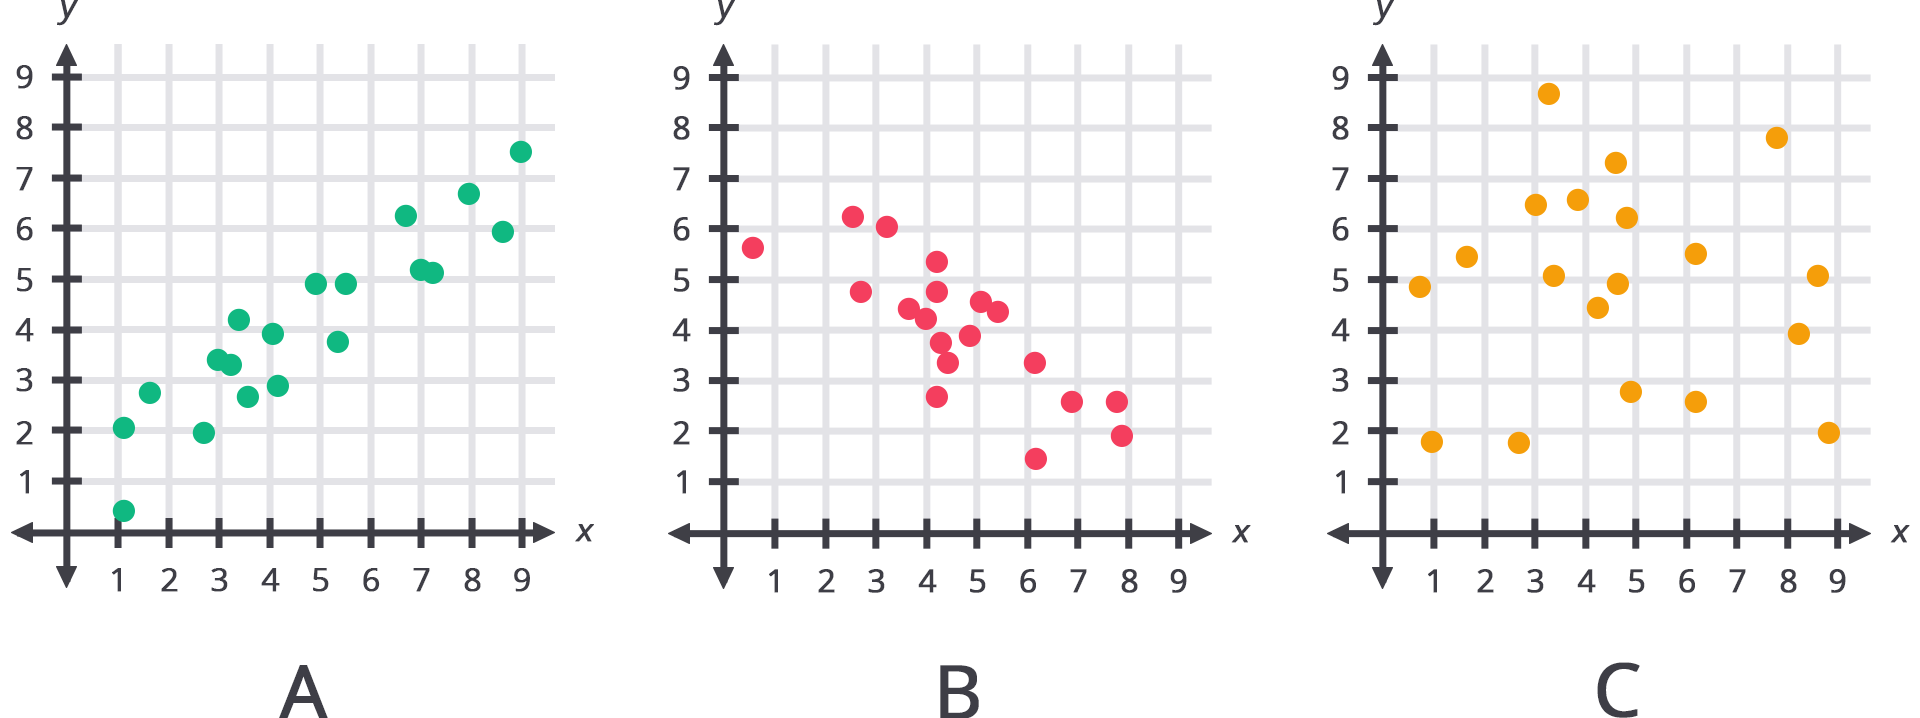

Dari pola sebaran data (titik-titik) pada gambar di atas, pola data grafik A memiliki korelasi positif. Hal ini ditandai dengan meningkatnya variabel pada sumbu y saat terjadi peningkatan variabel pada sumbu x. Sedangkan, pola data grafik B memiliki korelasi negatif yang ditandai dengan menurunnya variabel y saat terjadi kenaikan pada variabel x. Terakhir, sebaran pada data grafik C menunjukkan pola acak, artinya tidak ada korelasi data.

Pada pola sebaran data grafik pairplot sebelumnya, terlihat ‘carat’, ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi dengan fitur "price". Sedangkan kedua fitur lainnya yaitu 'depth' dan 'table' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Untuk mengevaluasi skor korelasinya, gunakan fungsi `corr()`.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

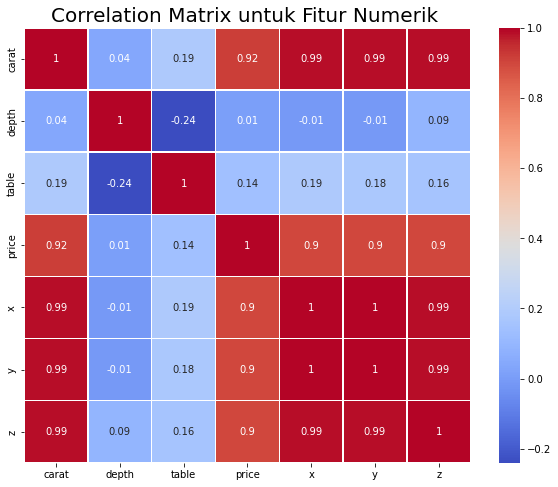

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Sebelum mengamati gambar di atas, mari kita simak penjelasan mengenai hubungan korelasi antar fitur. 

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun).

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut.

Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.05). Sehingga, fitur tersebut dapat di-drop.

In [ ]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


Sampai di sini kita telah melakukan analisis data dengan teknik EDA. Berikutnya, kita akan melakukan proses data preparation sebelum membuat model prediktif dengan machine learning. Tetap semangat ya!



---



## Data Preparation

Bayangkan Anda akan memasak. Sebelum memulai, tentunya Anda perlu melakukan persiapan terlebih dahulu. Tahap ini meliputi proses mencuci dan menakar bahan makanan, memotong-motong, serta membagi bahan mana yang akan dimasukkan terlebih dahulu dan bahan mana yang dimasukkan belakangan. Selain itu, kadang Anda juga melakukan pra-pemrosesan bahan makanan, misalnya merebus telur atau daging terlebih dahulu sebelum dimasak bersama bahan-bahan lainnya.

Demikian juga saat bekerja dengan data. Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Pada bagian ini kita akan melakukan empat tahap persiapan data, yaitu:

* Encoding fitur kategori.
* Reduksi dimensi dengan Principal Component Analysis (PCA).
* Pembagian dataset dengan fungsi `train_test_split` dari library sklearn.
* Standarisasi.

Tanpa menunggu lama, yuk langsung kita terapkan proses ini pada dataset.

### Encoding Fitur Kategori

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik *one-hot-encoding*. Library pandas menyediakan fungsi ini untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Kita memiliki tiga variabel kategori dalam dataset kita, yaitu ‘cut’, ‘color’, dan ‘clarity. Mari kita lakukan proses encoding ini dengan fitur `get_dummies`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)
diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


Sekarang, variabel kategori kita telah berubah menjadi variabel numerik.

### Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik reduksi untuk mengubah fitur asli menjadi kumpulan fitur lain yang tidak berkorelasi linier, disebut komponen utama (PC).

PCA bekerja menggunakan metode aljabar linier. Ia mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n. Kadang, ia hanya menggunakan beberapa komponen utama dan mengabaikan sisanya. Berikut penjelasan untuk masing-masing komponen utama (PC):

* PC pertama adalah komponen yang paling banyak menangkap informasi dari semua fitur.

* PC kedua menangkap sebagian besar informasi yang tersisa setelah komponen pertama. 

* PC ketiga menangkap sebagian besar informasi yang tersisa setelah komponen pertama dan kedua, dst.


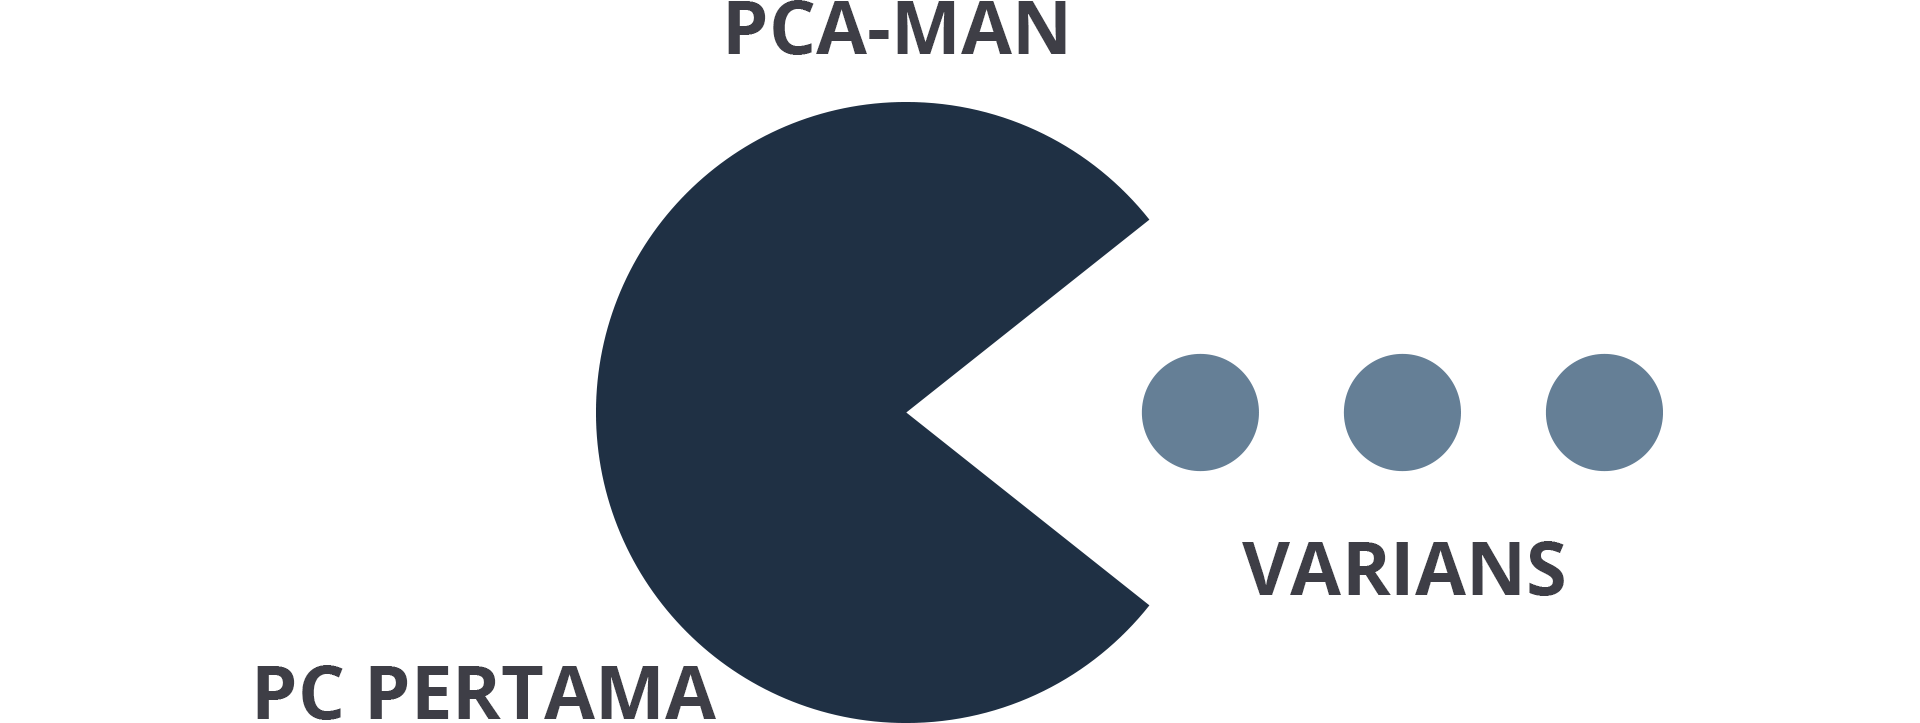

Jika kita cek menggunakan fungsi `pairplot`, ketiga fitur ukuran diamonds dalam kolom ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi. Hal ini karena ketiga fitur ini memiliki informasi yang sama, yaitu ukuran diamonds. 

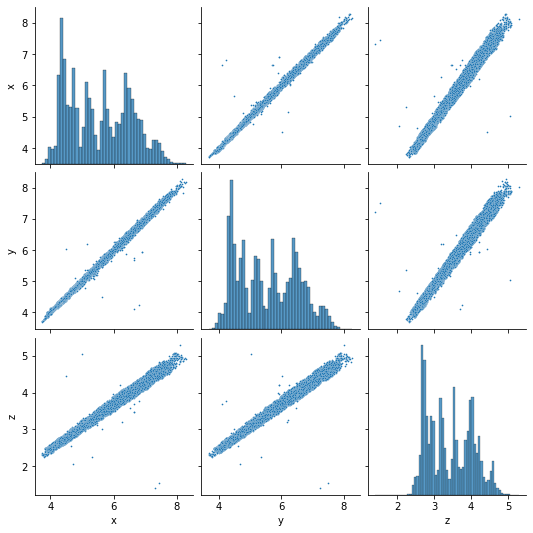

In [ ]:
sns.pairplot(diamonds[['x', 'y', 'z']], plot_kws={"s": 3});

Selanjutnya, aplikasikan class [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) dari library scikit learn dengan kode berikut.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x', 'y', 'z']])
princ_comp = pca.transform(diamonds[['x', 'y', 'z']])

Kode di atas memanggil class `PCA()` dari library sciikit-learn. Paremeter yang kita masukkan ke dalam class adalah `n_components` dan `random_state`.

Parameter n_components merupakan jumlah komponen atau dimensi, dalam kasus kita jumlahnya ada 3, yaitu 'x', 'y', dan 'z'. 

Sedangkan, parameter [random_state](https://scikit-learn.org/stable/glossary.html#term-random_state) berfungsi untuk mengontrol random number generator yang digunakan.

Parameter ini berupa bilangan integer dan nilainya bebas. Pada kasus ini, kita menerapkan random_state = 123. Berapa pun nilai integer yang kita tentukan --selama itu bilangan integer, ia akan memberikan hasil yang sama setiap kali dilakukan pemanggilan fungsi (dalam kasus kita, class PCA). 

Menentukan parameter random_state bertujuan untuk dapat memastikan bahwa hasil pembagian dataset konsisten dan memberikan data yang sama setiap kali model dijalankan. Jika tidak ditentukan, maka tiap kali melakukan split, kita akan mendapatkan data train dan tes berbeda. Hal ini berpengaruh terhadap akurasi model ML yang menjadi berbeda tiap kali di-run. 

Nah, setelah menerapkan class PCA, kita bisa mengetahui proporsi informasi dari ketiga komponen tadi.

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Arti dari output di atas adalah, 99.8% informasi pada ketiga fitur ‘x’, ‘y’, ‘z’ terdapat pada PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat pada PC kedua dan ketiga. Perhatikanlah, jumlahnya jadi > 100%. Hal ini disebabkan oleh proses pembulatan (round) dalam 3 desimal ya, jadi tidak perlu khawatir. 

Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur lainnya ('x', 'y', 'z'). Kita beri nama fitur ini 'dimension'.

Sekarang Anda akan membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'x', 'y', dan'z' . Oleh karena itu, mari jalankan kode di atas dengan beberapa perubahan berikut:

* Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
* Fit model dengan data masukan.
* Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
* Drop kolom ‘x’, ‘y’, dan ‘z’.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

### Train-Test-Split

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru. Ketahuilah bahwa setiap transformasi yang kita lakukan pada data sebelum pemodelan juga merupakan bagian dari model. Karena data uji (test set) berperan sebagai data baru, kita perlu melakukan semua proses transformasi dalam data latih. Inilah alasan mengapa langkah awal adalah membagi dataset sebelum melakukan transformasi apa pun [25](https://www.oreilly.com/library/view/hands-on-predictive-analytics/9781789138719/c37ca33e-1df8-4712-8e00-99cabc438404.xhtml). Tujuannya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih. 

Selama ini, kesalahan yang sering dilakukan oleh praktisi machine learning adalah melakukan proses scaling (penyekalaan) seperti normalisasi dan standarisasi sebelum membagi data menjadi data latih dan data uji. Hal ini berpotensi menimbulkan kebocoran data (data leakage). Proses scaling pada seluruh dataset membuat model memiliki informasi mengenai distribusi pada data uji. Informasi tentang data uji (yang seharusnya tidak dilihat oleh model) turut diikutsertakan dalam proses transformasi data latih. Oleh karena itu, kita akan melakukan proses scaling secara terpisah antara data latih dan data uji. 

Kembali pada bahasan mengenai train_test_split, proporsi pembagian data latih dan uji biasanya adalah 80:20. Ingatlah bahwa proporsi ini hanya kebiasaan umum saja. Tujuan dari data uji adalah untuk untuk mengukur kinerja model pada data baru. Jadi, jika dataset yang kita miliki berukuran sangat kecil, misalnya kurang dari 1.000 sampel, maka pembagian 80:20 ini cukup ideal. Namun,  jika memiliki dataset berukuran besar, kita perlu memikirkan strategi pembagian dataset lain agar proporsi data uji tidak terlalu banyak.

Sebagai contoh, Anda memiliki dataset berjumlah 5 juta sampel. Dengan proporsi pembagian 80:20, maka data uji akan berjumlah 1 juta sampel. Tentu ini merupakan jumlah yang terlalu banyak karena kita tidak membutuhkan 1 juta sampel hanya untuk proses pengujian. Dalam kasus proses pengujian ini sebenarnya kita cukup menggunakan 1-2% data atau sebanyak 100.000 hingga 200.000 sampel saja. 

Pada modul ini, kita akan menggunakan proporsi pembagian sebesar 90:10 dengan fungsi `train_test_split` dari sklearn. 

In [ ]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(['price'], axis=1)
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

Untuk mengecek jumlah sampel pada masing-masing bagian, kita gunakan code berikut.

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


### Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. 

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn, 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji. Untuk lebih jelasnya, mari kita terapkan StandardScaler pada data. 

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:

In [ ]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

Sampai di tahap ini, data kita telah siap untuk dilatih menggunakan model machine learning. Yay! Siap lanjut ke modul berikutnya?

Siap donk :)



---



## Model Development

Sampailah kita pada tahap pengembangan model setelah semua proses yang kita lewati dari business understanding, data understanding, dan data preparation. Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita kembangkan, antara lain:

1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

Apakah Anda sudah familier menggunakan algoritma-algoritma di atas? Atau ada yang baru mendengar algoritma-algoritma ini? Tidak apa-apa, kita akan bahas sama-sama.

### Model Development : K-Nearest Neighbor

Pertama, kita akan bekerja dengan algoritma K-NN. Sebelum menulis code, Anda perlu memahami apa itu KNN dan bagaimana KNN bekerja. 

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k-tetangga terdekat. Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada modul ini, kita akan menggunakannya untuk kasus regresi.

Bagaimana algoritma KNN bekerja pada kasus regresi? Perhatikan penjelasan dan ilustrasi berikut ya.

Bayangkan Anda ingin memprediksi berapa lama waktu yang diperlukan untuk perjalanan dari rumah ke kantor. Setiap hari selama beberapa minggu, Anda mencatat waktu berangkat dan lama perjalanan yang dibutuhkan hingga sampai di kantor. Waktu perjalanan Anda tentu dipengaruhi oleh beberapa hal, misalnya arus lalu lintas yang bervariasi di pagi hari. Hal ini menyebabkan waktu perjalanan Anda berubah, tergantung jam berapa Anda berangkat. Contoh grafik waktu keberangkatan dan lama perjalanan dapat dilihat pada gambar berikut.

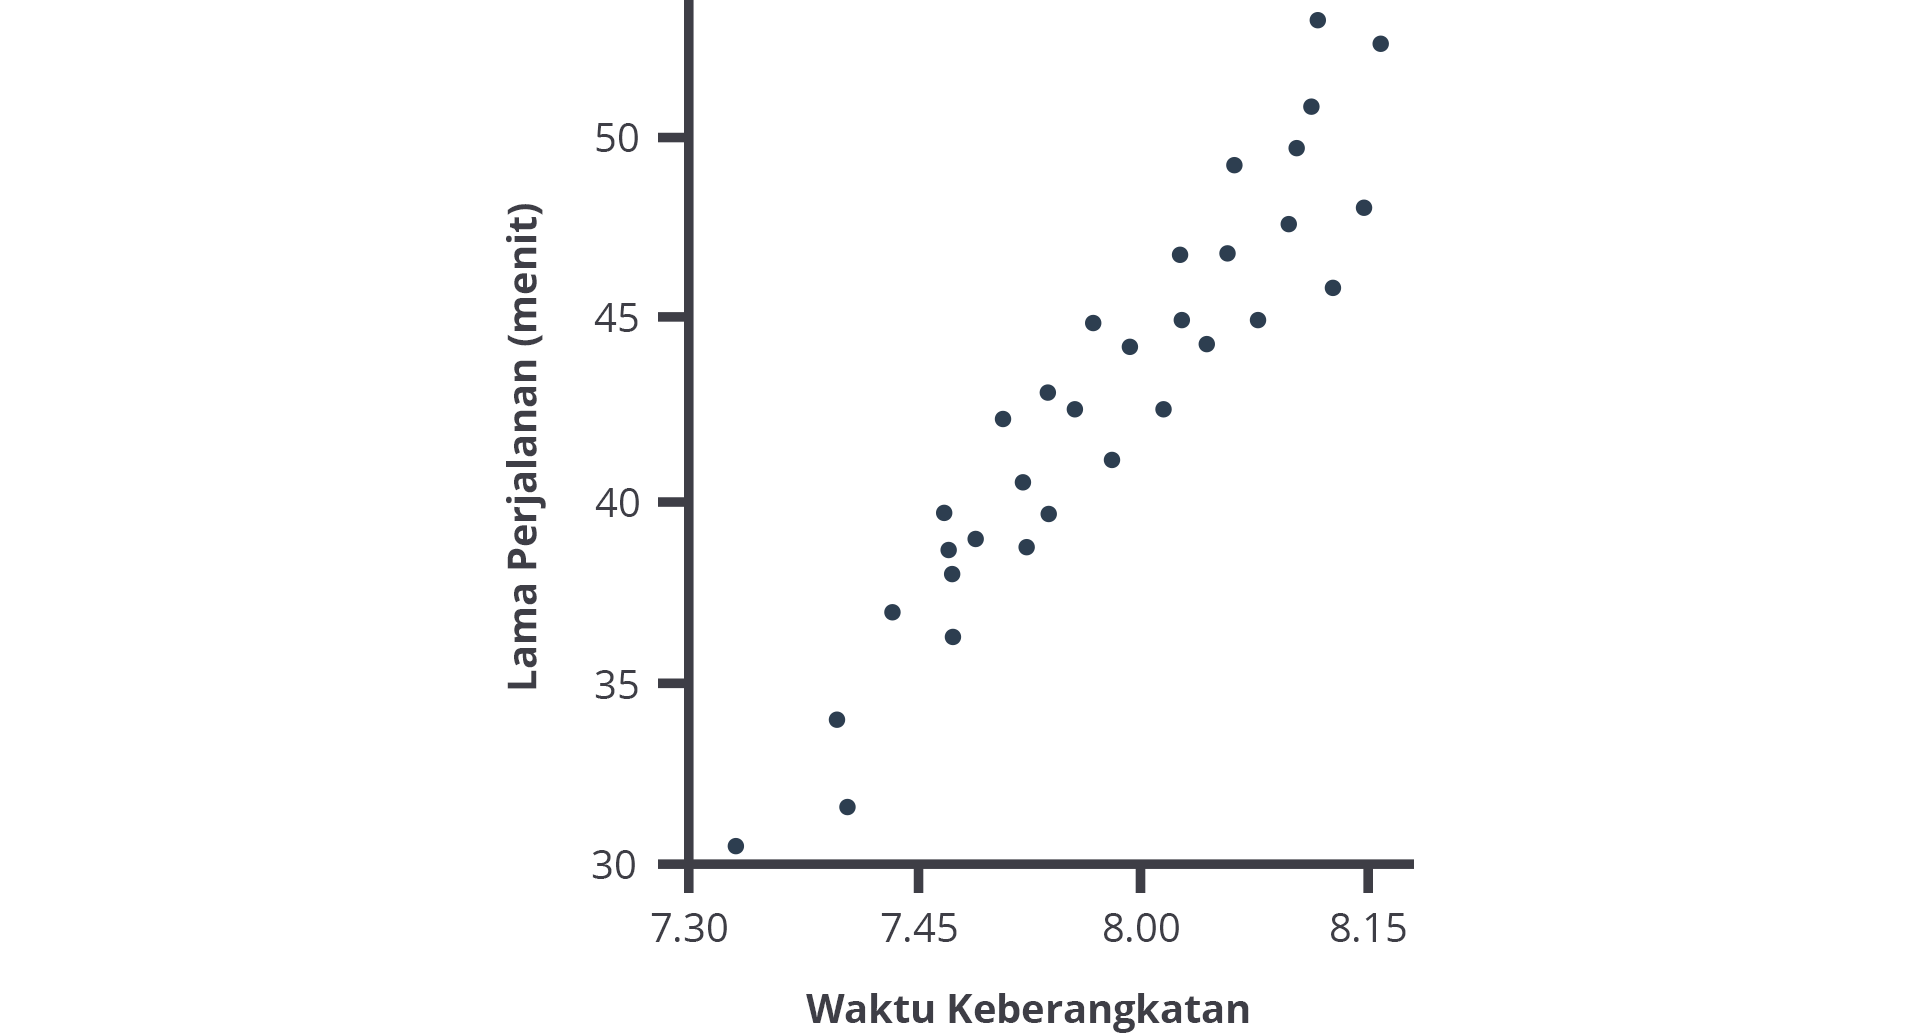

Kemudian, dengan memilih sebuah nilai X, kita akan mendapatkan tiga titik prediksi paling dekat dengan nilai X yang dipilih. Pada grafik ini ditandai dengan lingkaran merah pada titik biru. Nilai prediksi terbaik untuk X berdasarkan ketiga titik ini adalah titik yang berwarna merah, misalnya. Titik merah ini diperoleh dari jarak rata-rata ketiga titik biru dengan lingkaran merah.

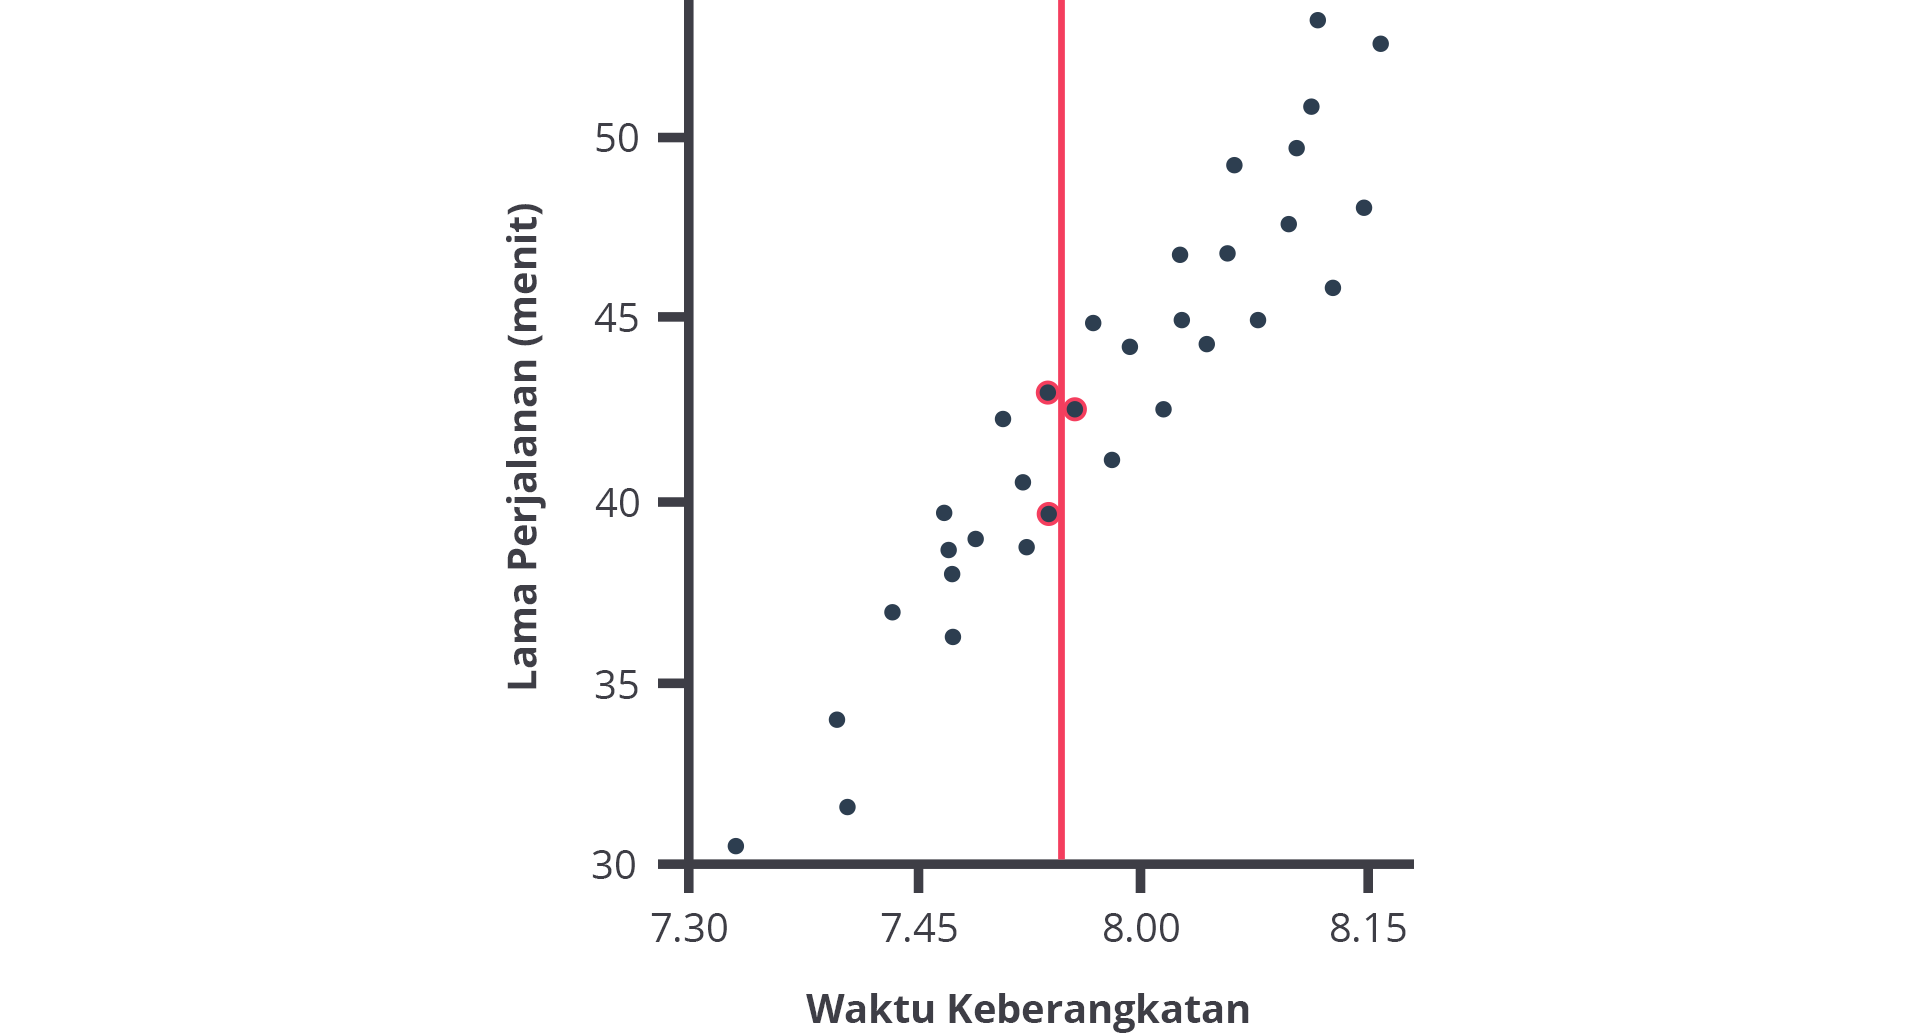

Selanjutnya, bayangkan Anda melakukan ini pada semua kemungkinan nilai masukan sehingga memperoleh nilai prediksi di beberapa tempat.

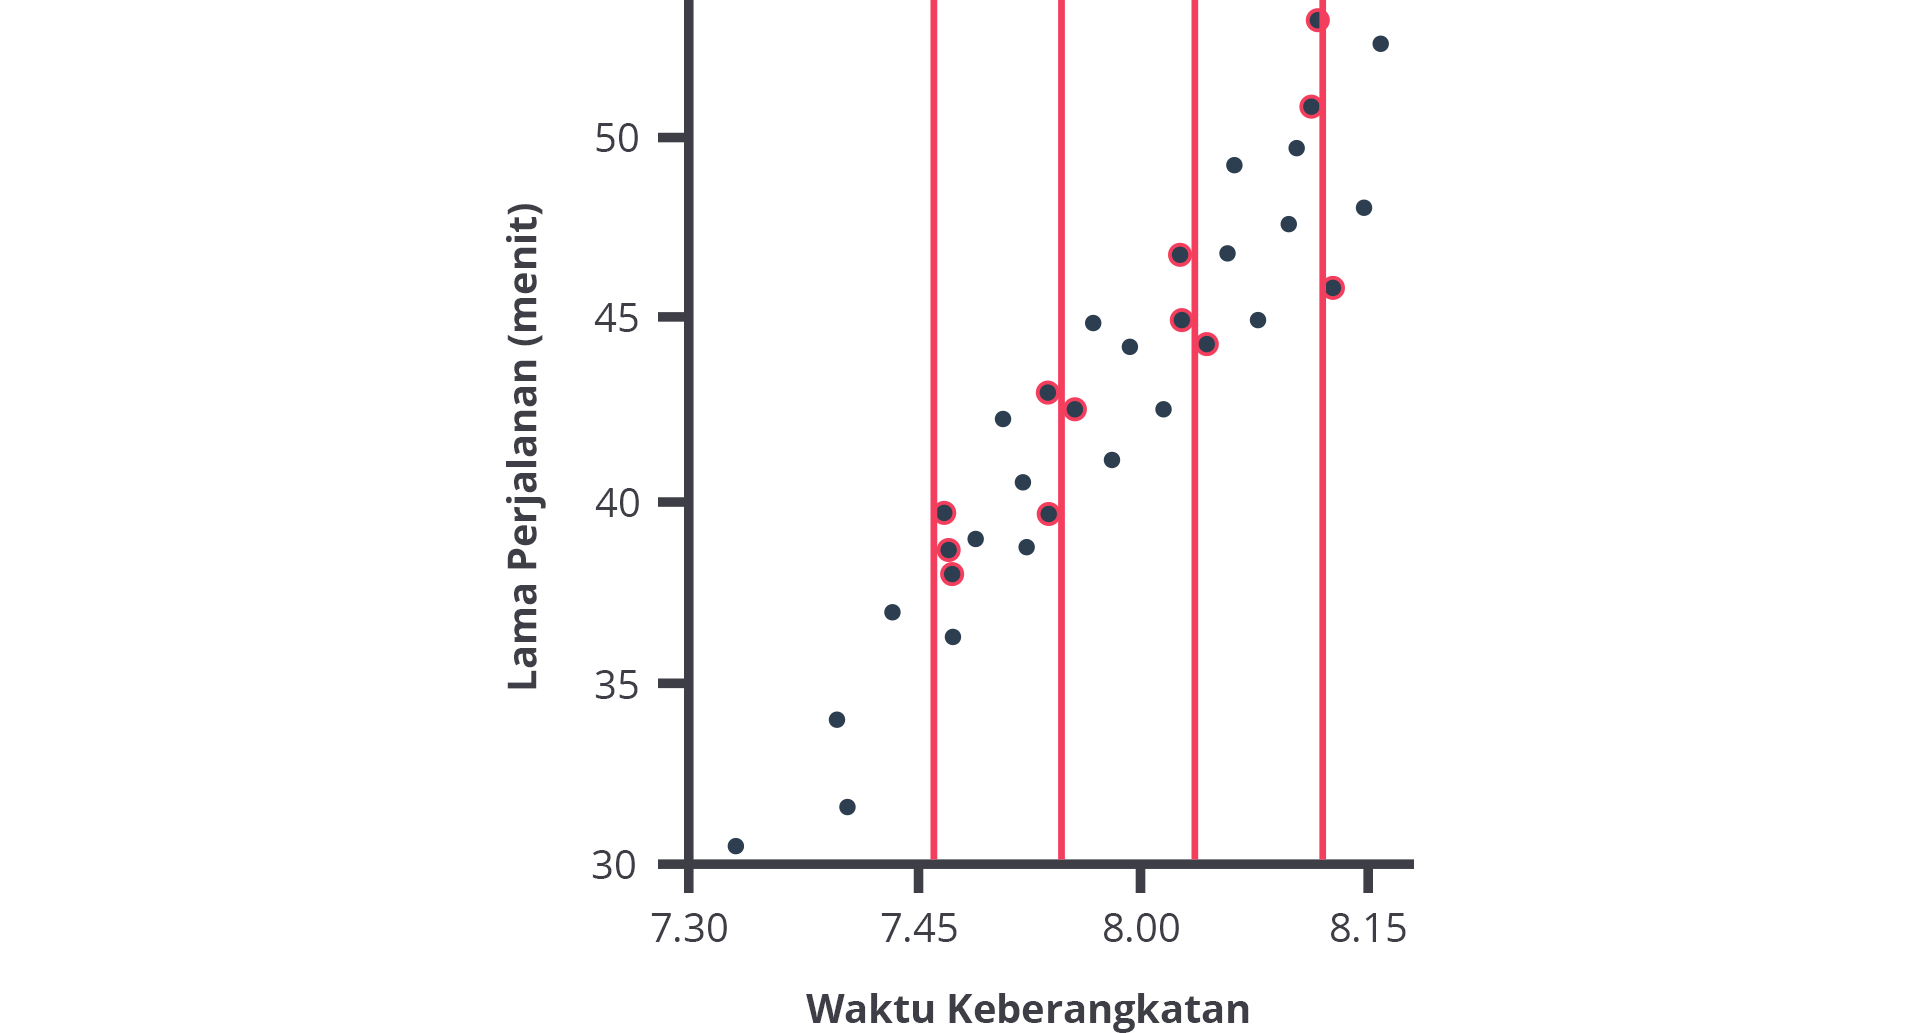

Tahap terakhir adalah menghubungkan setiap prediksi ini sehingga memberi kita hasil regresi sebagai berikut:

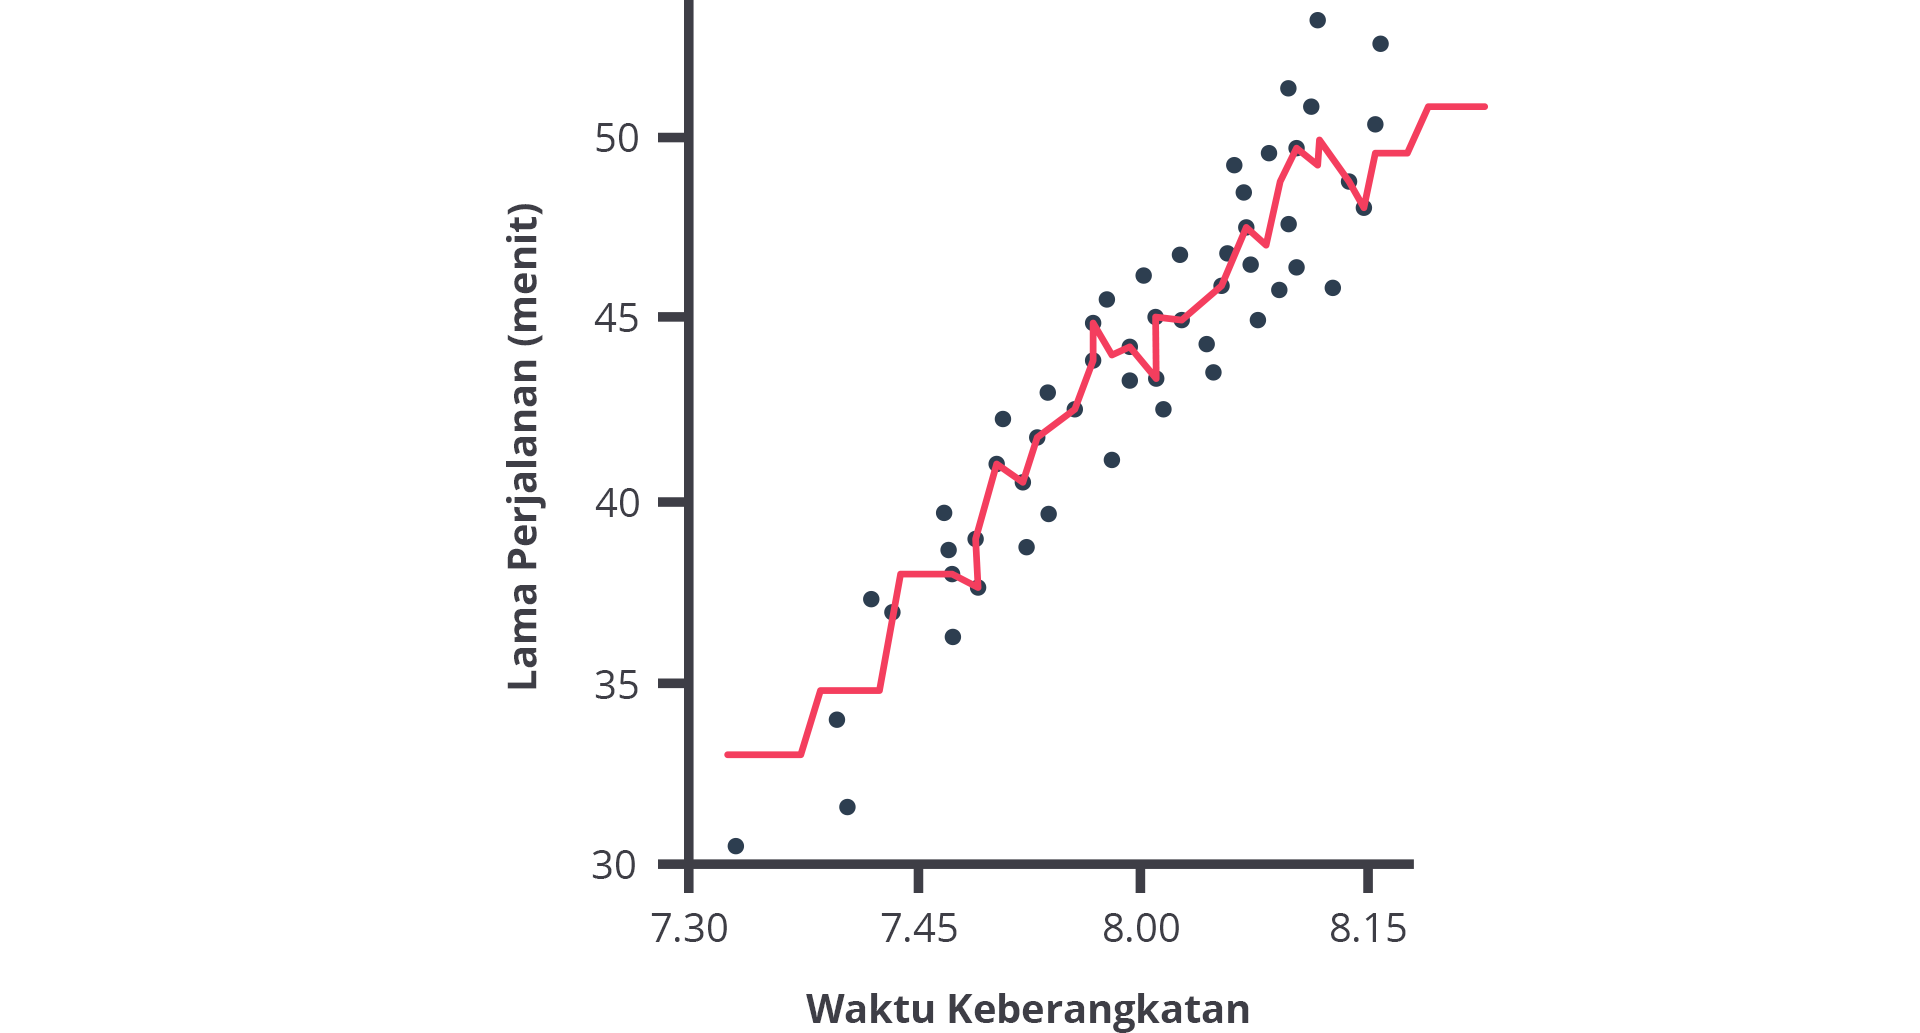

Pada contoh kasus di atas, kita membuat prediksi dengan nilai k = 3. Memilih nilai k yang lebih besar dapat membantu menghindari overfit, meskipun kadang bisa menyebabkan kehilangan kemampuan prediksi. Pada prediksi dengan nilai k = 1 (hanya mengecek satu tetangga terdekat), maka hasilnya akan sangat rigid atau kaku. Sedangkan jika kita set nilai k lebih besar, misalnya pada kasus ini k = 10, maka hasil prediksi akan lebih smooth (halus).

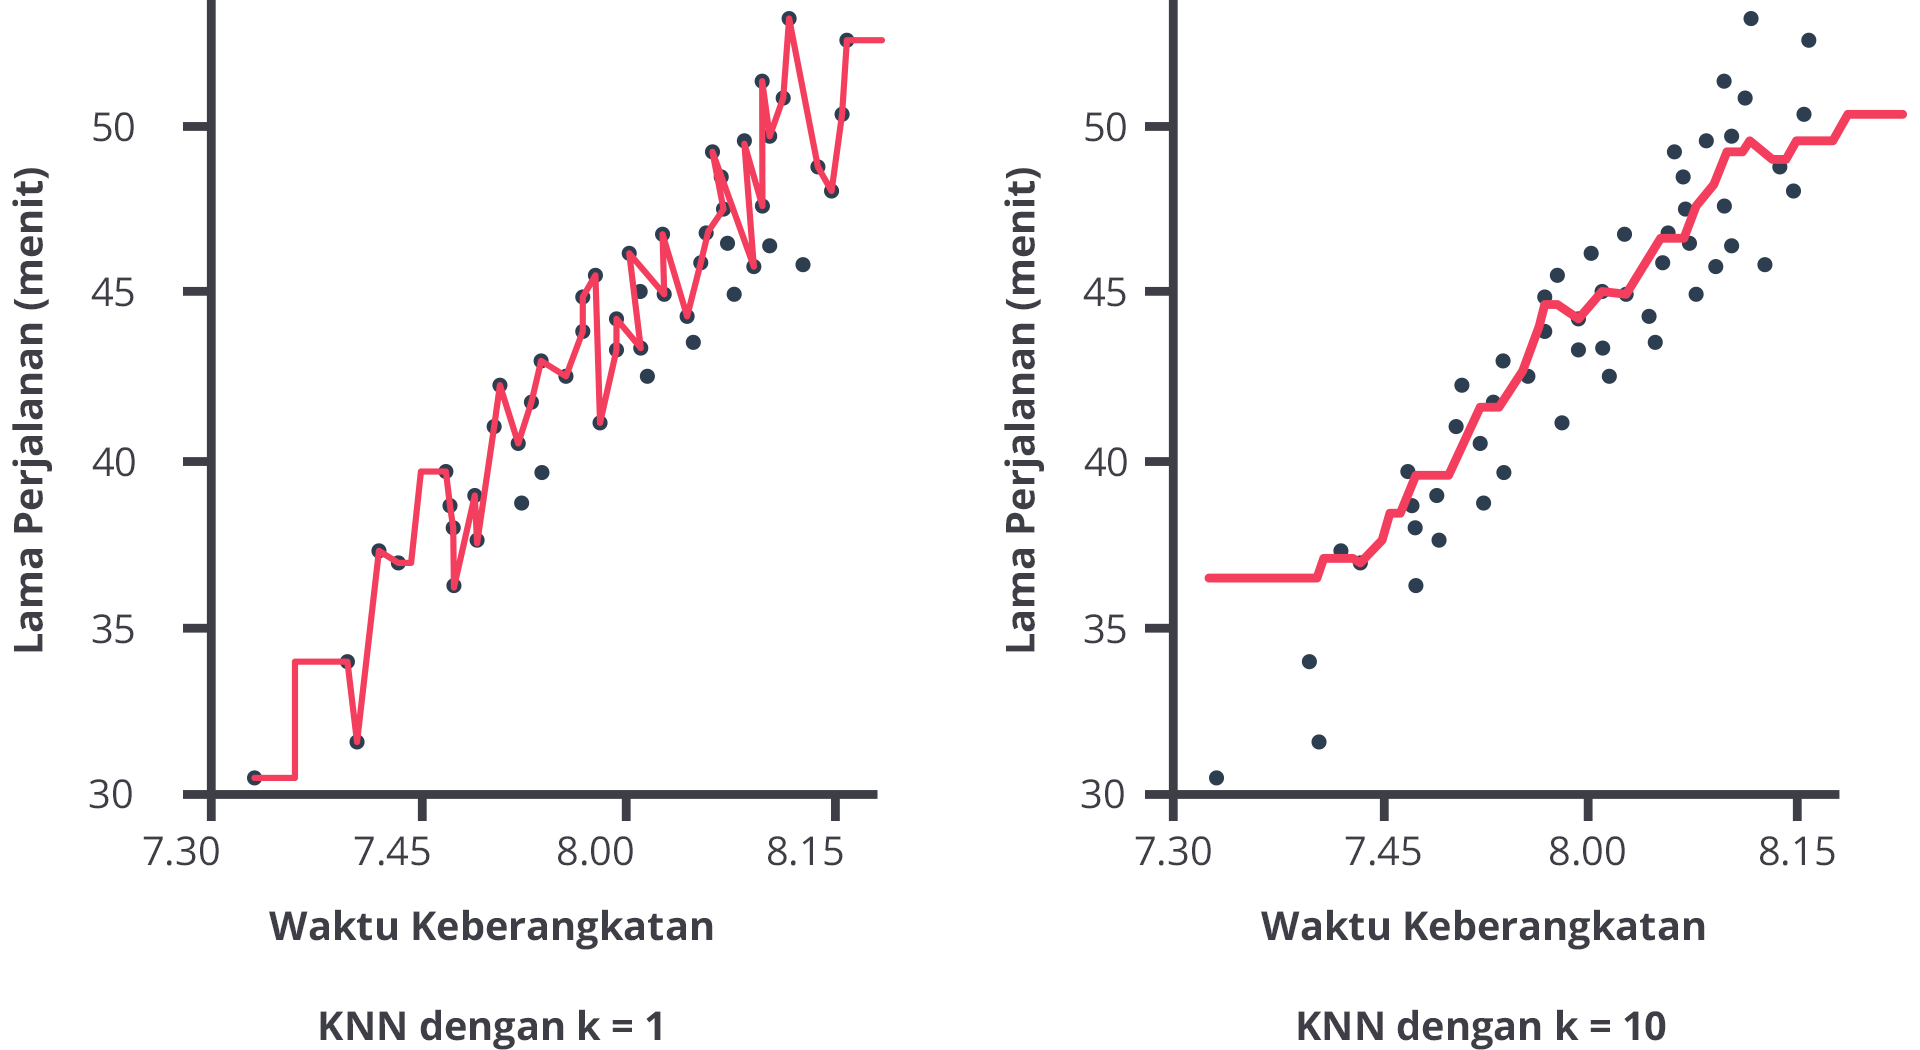

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi [26](https://www.oreilly.com/library/view/machine-learning-with/9781617296574/). Namun, kita dapat mencoba beberapa nilai k yang berbeda, misal: nilai dari 1 hingga 21, kemudian membandingkan mana nilai yang paling sesuai untuk model. Kompleksitas komputasi KNN meningkat seiring dengan meningkatnya ukuran dataset.

Selanjutnya, untuk menentukan titik mana dalam data yang paling mirip dengan input baru, KNN menggunakan perhitungan ukuran jarak. Metrik ukuran jarak yang digunakan secara default pada library sklearn adalah Minkowski [27](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Beberapa metrik ukuran jarak yang juga sering dipakai antara lain: Euclidean distance dan Manhattan distance.

Sebagai contoh, jarak Euclidean dihitung sebagai akar kuadrat dari jumlah selisih kuadrat antara titik a dan titik b. Dirumuskan sebagai berikut:

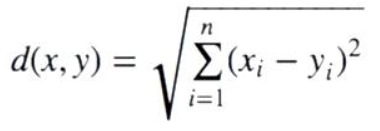

Sedangkan, Minkowski distance merupakan generalisasi dari Euclidean dan Manhattan distance. Untuk menghitungnya, perhatikan rumus berikut:

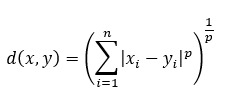

Nah, setelah memahami bagaimana KNN bekerja, mari langsung implementasikan algoritma KNN ke dalam kode.

Karena kita menggunakan tiga buah model, siapkan data frame untuk analisis model terlebih dahulu.

In [ ]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Selanjutnya, untuk melatih data dengan KNN, tuliskan code berikut.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

Kita menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik. Pada tahap ini kita hanya melatih data training dan menyimpan data testing untuk dilatih di tahap evaluasi. 

Meskipun algoritma KNN mudah dipahami dan digunakan, ia memiliki kekurangan jika dihadapkan pada jumlah fitur atau dimensi yang besar. Permasalahan ini sering disebut sebagai **curse of dimensionality** (kutukan dimensi). Pada dasarnya, permasalahan ini muncul ketika jumlah sampel meningkat secara eksponensial seiring dengan jumlah dimensi (fitur) pada data. Jadi, jika Anda menggunakan model KNN, pastikan data yang digunakan memiliki fitur yang relatif sedikit, ya!

Selanjutnya, kita akan melatih model kita dengan algoritma yang kedua, yaitu Random Forest. Sudah siap untuk mulai?



---



### Model Development : Random Forest

Algoritma random forest adalah salah satu algoritma supervised learning. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni. 

Random forest termasuk ke dalam kelompok model ensemble (group). Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir.

Ada dua teknik pendekatan dalam membuat model ensemble, yaitu **bagging** dan **boosting**. Jangan bingung dulu dengan istilah ini ya. Kita akan bahas satu per satu. 

**Bagging** atau *bootstrap aggregating* adalah teknik yang melatih model dengan sampel random. Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement (proses sampling dengan penggantian) [19](https://machinelearningbook.com/). Ketika kita melakukan sampling with replacement, sampel dengan nilai yang berbeda bersifat independen. Artinya, nilai suatu sampel tidak mempengaruhi sampel lainnya [28](https://web.ma.utexas.edu/users/parker/sampling/repl.htm). Akibatnya, model yang dilatih akan berbeda antara satu dan lainnya.

Berikut adalah ilustrasi pembuatan model ensemble dengan teknik bagging [19](https://machinelearningbook.com/).

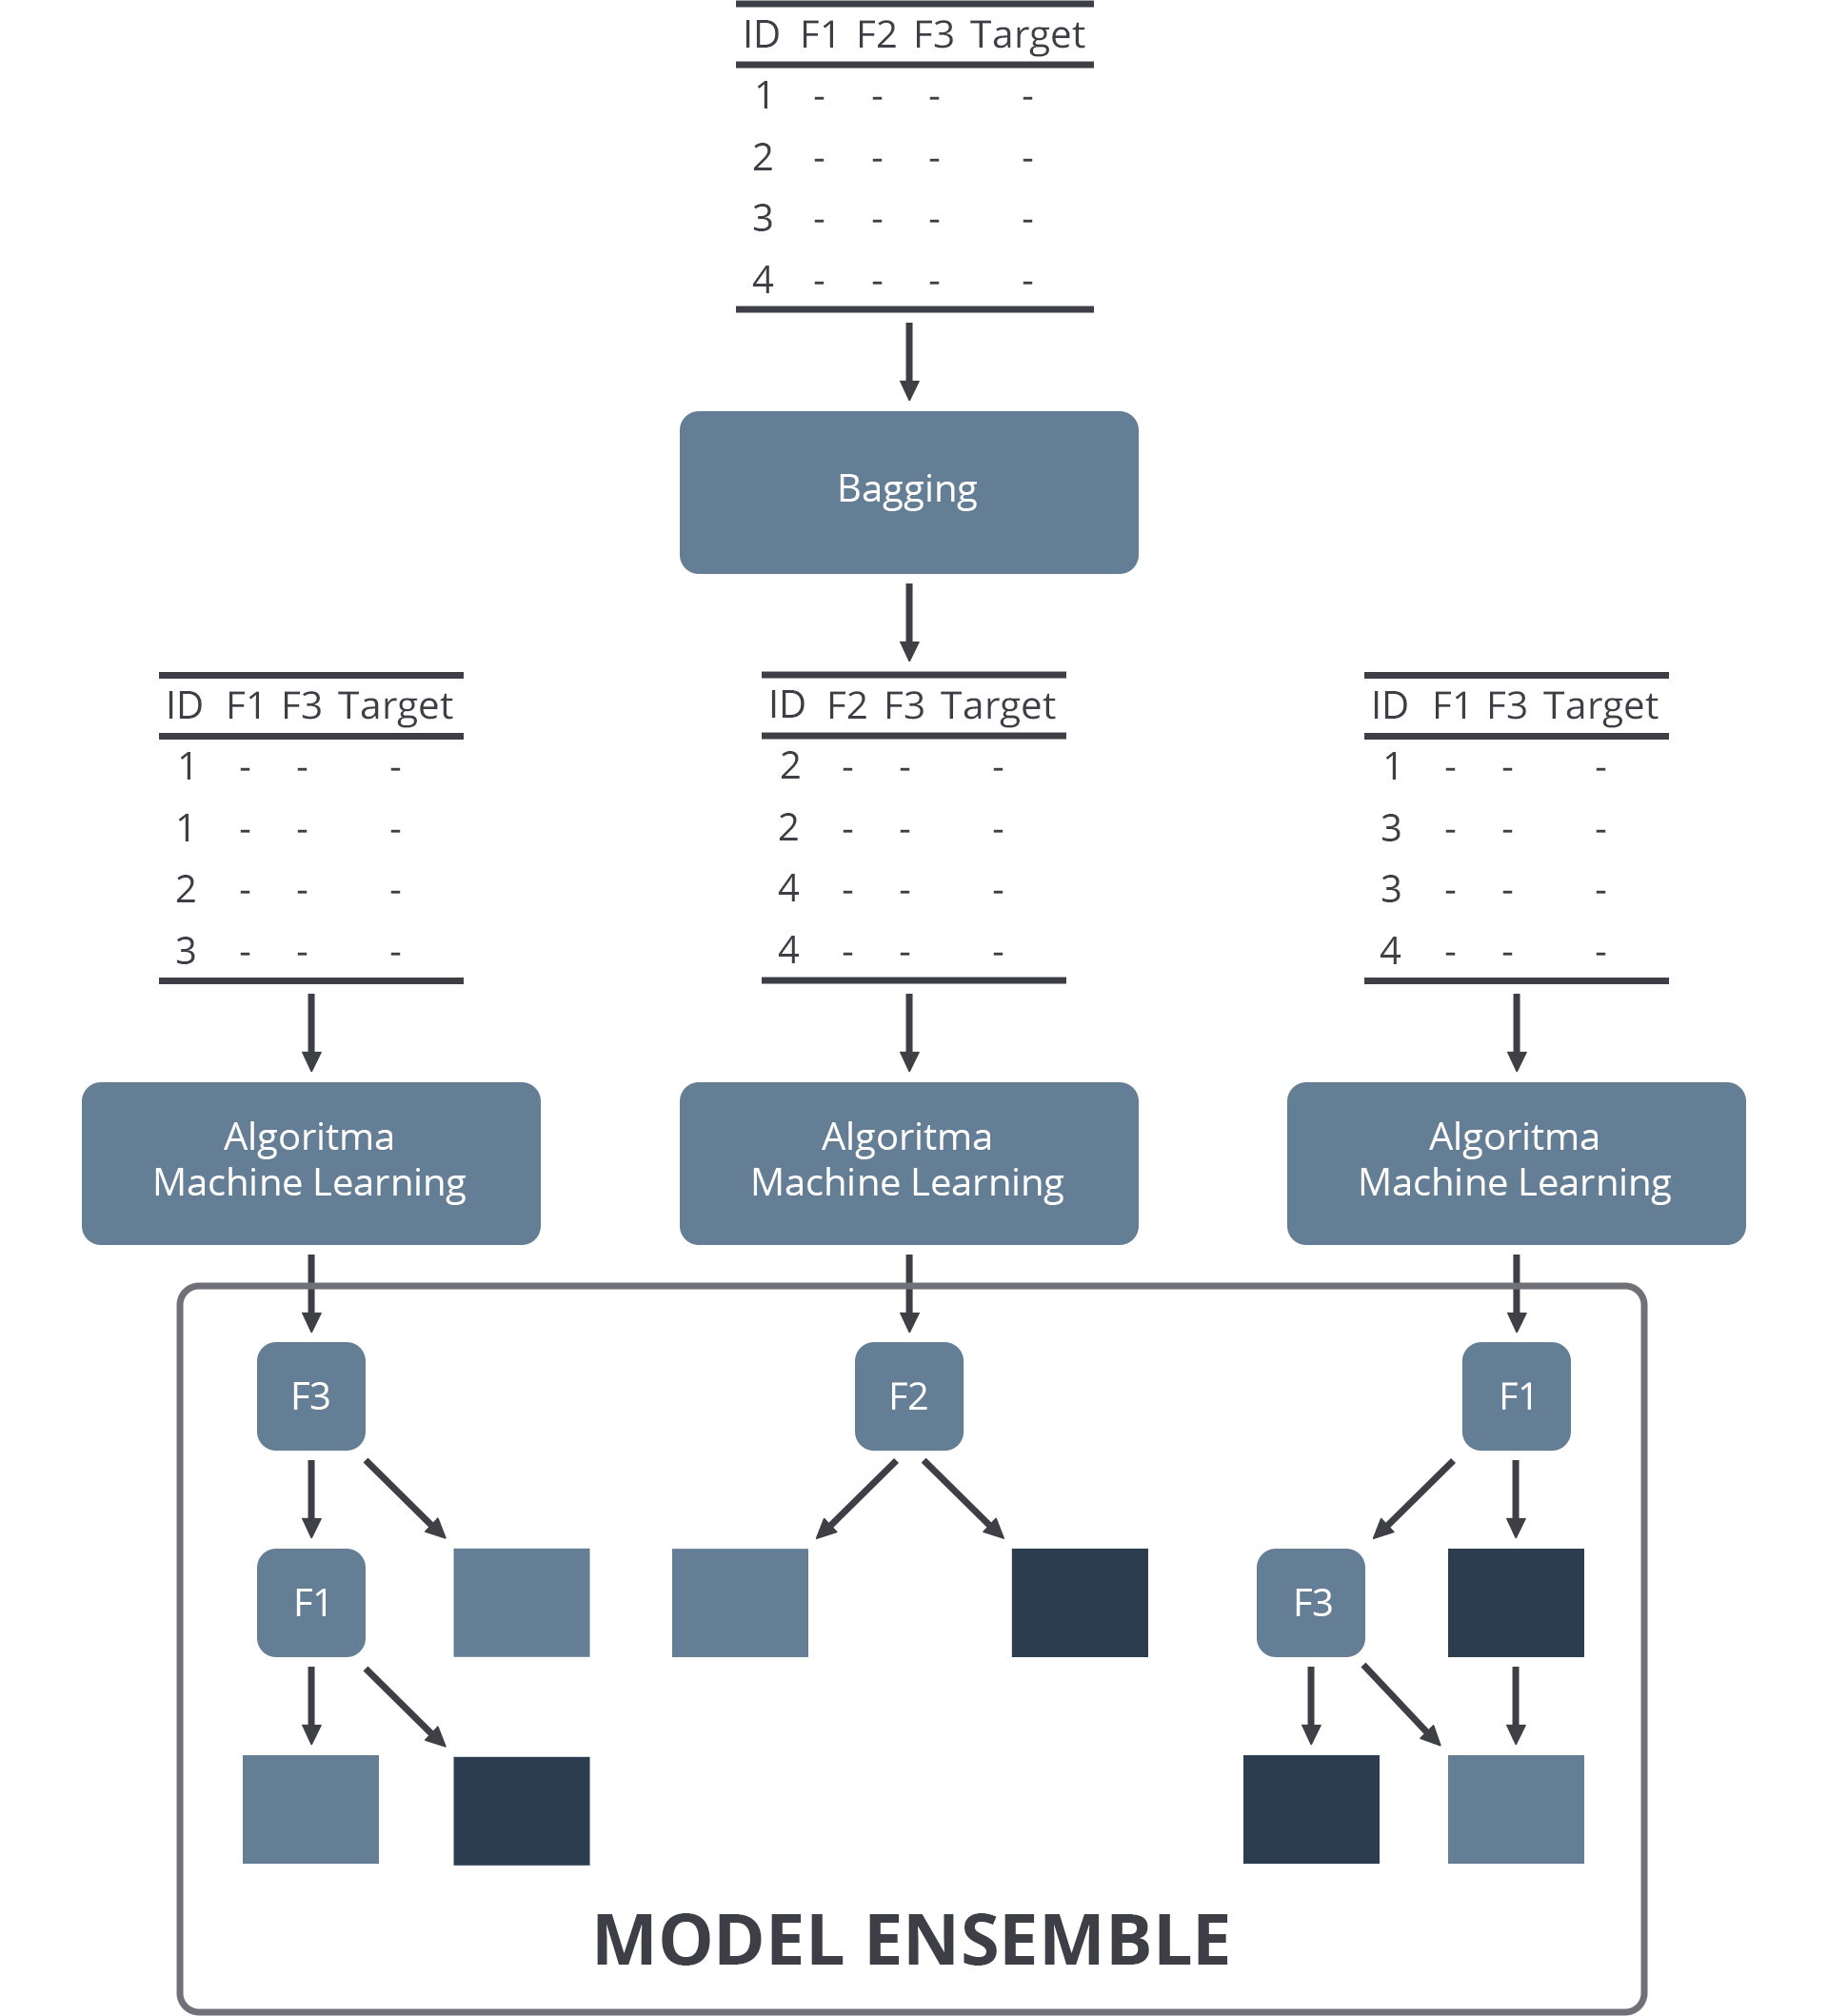

Algoritma yang cocok untuk teknik bagging ini adalah decision tree. Nah, random forest pada dasarnya adalah versi bagging dari algoritma decision tree. Bayangkan Anda memiliki satu bag (tas) random forest yang berisi beberapa model decision tree. Model decision tree masing-masing memiliki hyperparameter yang berbeda dan dilatih pada beberapa bagian (subset) data yang berbeda juga. Teknik pembagian data pada algoritma decision tree adalah memilih sejumlah fitur (misal x kolom) dan sejumlah sampel (misal y baris) secara acak dari dataset yang terdiri dari (misalnya) *n* fitur dan *m* contoh. 

Misalnya, ada 100 model decision tree pada bag random forest kita, ini berarti bahwa keputusan (decision) yang dibuat oleh setiap pohon (model) akan sangat bervariasi. Pada kasus klasifikasi, prediksi akhir diambil dari prediksi terbanyak pada seluruh pohon. Sedangkan, pada kasus regresi, prediksi akhir adalah rata-rata prediksi seluruh pohon dalam model ensemble. 

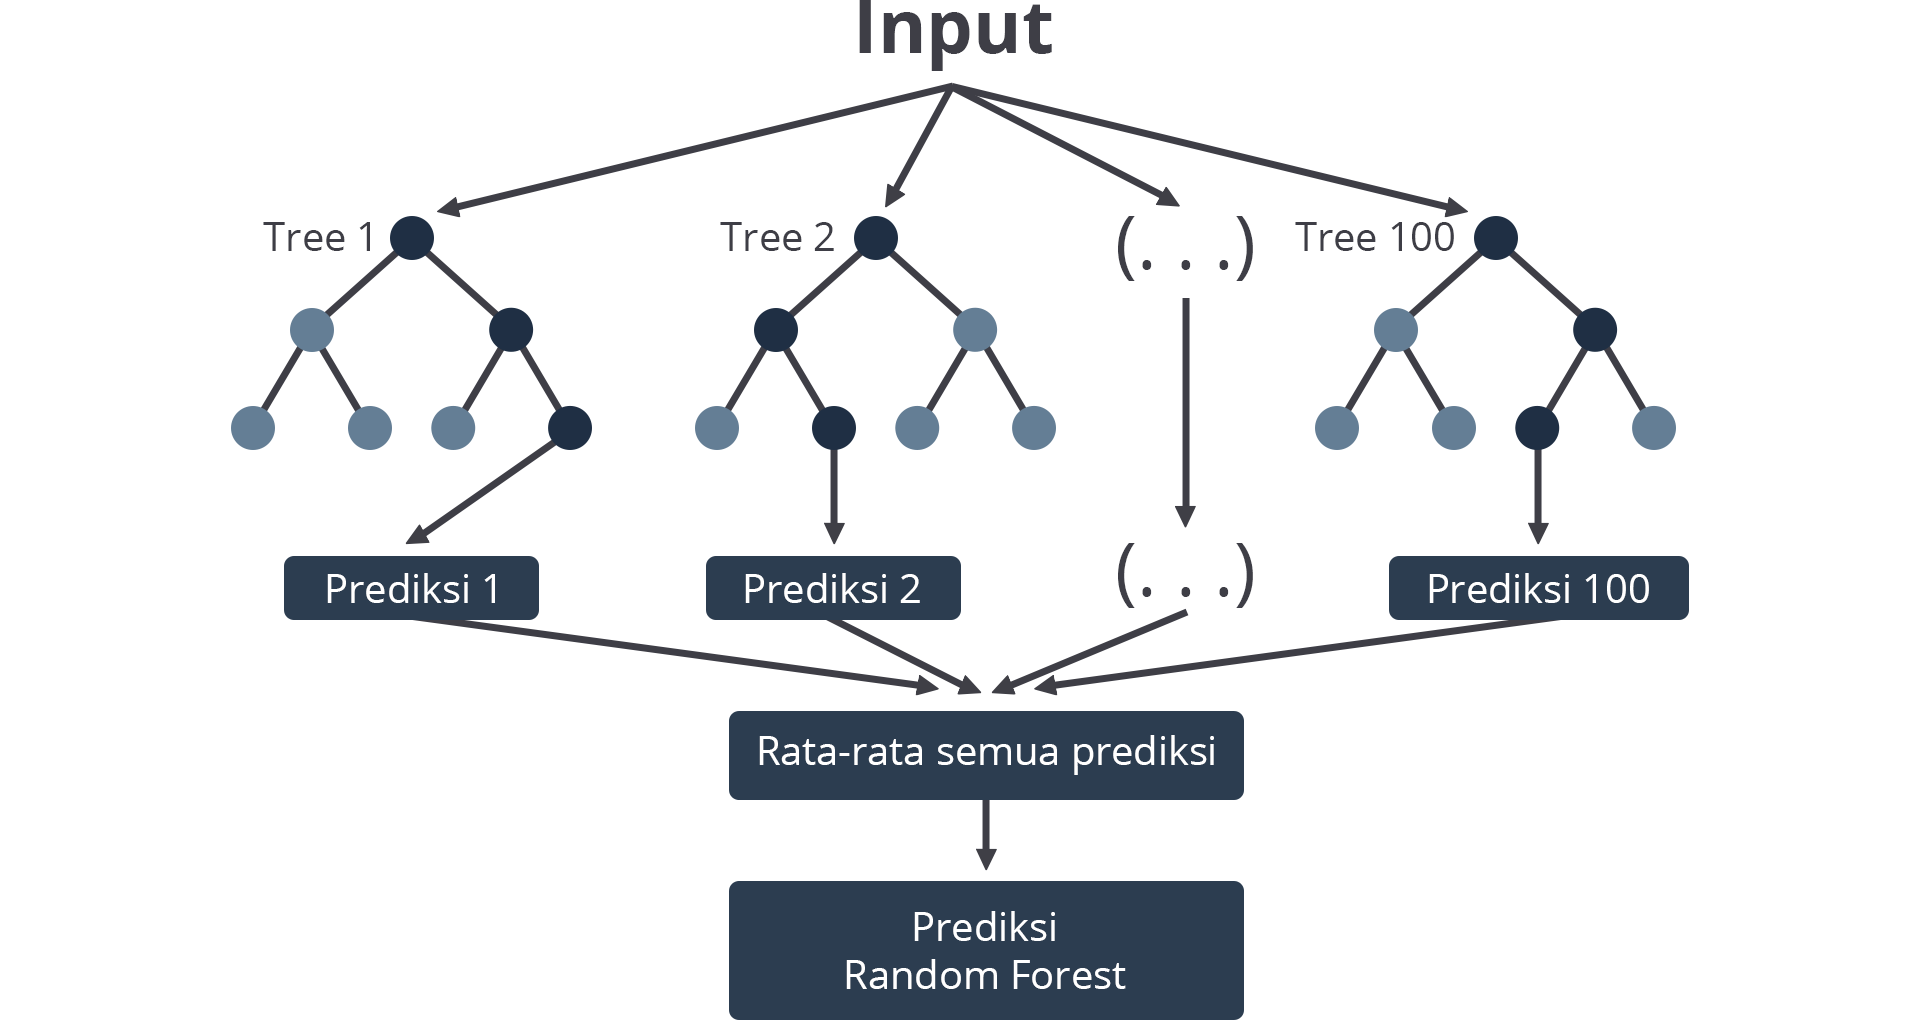

Sekarang tentu Anda mengerti, mengapa algoritma ini disebut sebagai random forest. Karena algoritma ini disusun dari banyak algoritma pohon (decision tree) yang pembagian data dan fiturnya dipilih secara acak.

Sampai di sini, mari kita lanjut menerapkan algoritma ini pada dataset menggunakan library scikit-learn.

In [ ]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Setelah model ini dijalankan (run), simpan dulu hasilnya untuk tahap evaluasi nanti. Sekarang, kita akan lanjut pada algoritma ketiga yaitu algoritma boosting di materi berikutnya. Semangat!



---



### Model Development : Boosting Algorithm

Pada modul sebelumnya, Anda telah belajar mengenai algoritma bagging. Selanjutnya, kita akan membahas mengenai algoritma boosting. Seperti yang dinyatakan pada bahasan sebelumnya, bagging dan boosting termasuk ke dalam ensemble learning. Lalu, apa perbedaan antara bagging dan boosting?

Sebagai model ensemble, keduanya terdiri dari beberapa model yang bekerja secara bersama-sama.
* Pada teknik bagging, setiap model dilatih secara paralel.
* Sedangkan, pada teknik boosting, model dilatih secara berurutan atau dalam proses yang iteratif. 

Algoritma boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. 

Model saja belajar dari kesalahan untuk memperbaiki diri, bagaimana dengan kita?

Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa. 

Algoritma boosting telah ada sejak puluhan tahun lalu. Namun, baru beberapa tahun ini ramai dibicarakan. Mengapa algoritma ini begitu populer akhir-akhir ini?

Salah satu alasannya adalah peningkatan algoritma boosting dalam kompetisi machine learning atau data science. Algoritma ini sangat powerful dalam meningkatkan akurasi prediksi. Algoritma boosting sering mengungguli model yang lebih sederhana seperti logistic regression dan random forest. Beberapa pemenang kompetisi di platform Kaggle menyatakan bahwa mereka menggunakan algoritma boosting atau kombinasi beberapa algoritma boosting dalam modelnya. Meskipun demikian, hal ini tetap bergantung pada kasus per kasus, ruang lingkup masalah, dan dataset yang digunakan.

Dilihat dari caranya memperbaiki kesalahan pada model sebelumnya, algoritma boosting terdiri dari dua metode:
* Adaptive boosting
* Gradient boosting

Pada modul ini, kita akan menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah **AdaBoost**, dikenalkan oleh Freund and Schapire (1995) [19](https://machinelearningbook.com/). Pertanyaannya adalah, bagaimana AdaBoost bekerja?

Awalnya, semua kasus dalam data latih memiliki weight atau bobot yang sama. Pada setiap tahapan, model akan memeriksa apakah observasi yang dilakukan sudah benar? Bobot yang lebih tinggi kemudian diberikan pada model yang salah sehingga mereka akan dimasukkan ke dalam tahapan selanjutnya. Proses iteratif ini berlanjutan sampai model mencapai akurasi yang diinginkan.

Untuk menerapkan model pada dataset, tulis code berikut. 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Kita simpan hasilnya untuk nanti. Sekarang, mari kita lanjutkan pada tahap evaluasi model.



---



## Evaluasi Model

Mengevaluasi model regresi sebenarnya relatif sederhana. Secara umum, hampir semua metrik adalah sama. Jika prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. Secara teknis, selisih antara nilai sebenarnya dan nilai prediksi disebut eror. Maka, semua metrik mengukur seberapa kecil nilai eror tersebut.

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi. MSE didefinisikan dalam persamaan berikut:

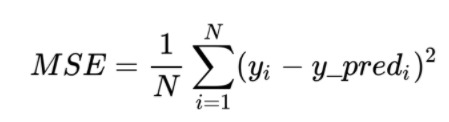

Keterangan:

* N = jumlah dataset
* yi = nilai sebenarnya
* y_pred = nilai prediksi

Namun, sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji. Sebelumnya, kita baru melakukan proses scaling pada data latih untuk menghindari kebocoran data. Sekarang, setelah model selesai dilatih dengan 3 algoritma, yaitu KNN, Random Forest, dan Adaboost, kita perlu melakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

Untuk proses scaling, masukkan kode berikut:

In [ ]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Selanjutnya, mari kita evaluasi ketiga model kita dengan metrik MSE yang telah dijelaskan di atas. Tuliskan kode berikut.

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,226.03,257.401
RF,59.2646,147.796
Boosting,928.043,865.121


Hasil evaluasi pada data latih dan data test adalah sebagai berikut.

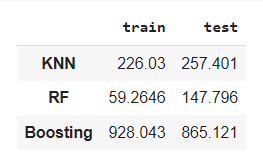

Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart. Tuliskan kode di bawah ini:

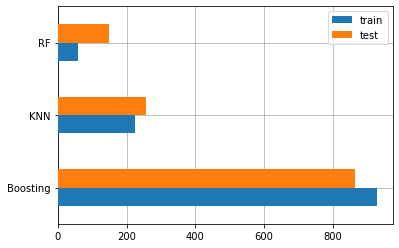

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Hasilnya sebagai berikut.

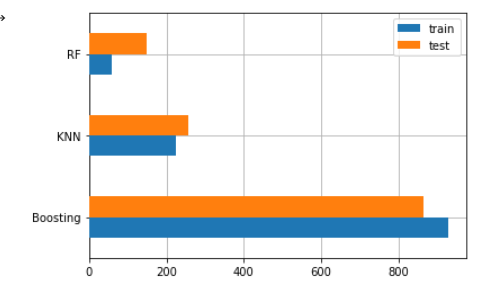

Dari gambar di atas, terlihat bahwa, model Random Forest memberikan nilai eror yang paling kecil. Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test.

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,923.2,883.5,789.2


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati. Anda juga bisa menguji hasil prediksi pada data lain dengan cara mengubah indeks pada X_test. Jika Anda merasa belum yakin dengan model ini, lakukanlah pengaturan parameter pada algoritma yang digunakan. Sebagai contoh, pada algoritma [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), Anda dapat mengubah berbagai parameter seperti `n_estimators` (jumlah pohon/trees dalam forest), atau parameter lain. Anda dapat merujuk pada dokumentasi Random Forest pada library sklearn untuk pengaturan parameter lainnya. 

Untuk melakukan peningkatan performa, lakukanlah hal yang sama (pengaturan parameter) pada semua algoritma yang digunakan. Selain itu, Anda juga dapat melakukan optimasi parameter dengan menerapkan teknik **Grid Search**. 

Jika telah yakin dengan performa model, Anda dapat melanjutkan ke tahapan selanjutnya yaitu melakukan deployment.



---



## Rangkuman Studi Kasus Pertama: Predictive Analytics

Anda berada di akhir dari modul Predictive Analytics. Mari kita uraikan apa saja materi yang telah dibahas pada modul ini.

* Memahami problem statement pada kasus prediksi harga diamonds
* Melakukan proses exploratory data analysis
* Melakukan tahap data preparation 
* Membuat model machine learning dengan pendekatan K-Nearest Neighbor
* Membuat model machine learning dengan pendekatan Random Forest
* Membuat model machine learning dengan pendekatan Boosting Algorithm
* Mengevaluasi Model

Dengan uraian tersebut, diharapkan Anda dapat memahami apa itu model predictive analytics dan langkah-langkah dalam membuat modelnya. Jika ada materi yang masih belum dipahami, Anda bisa mengulas kembali materi yang diberikan di modul ini atau menanyakan di forum diskusi. Yuk, sekarang kita lanjut ke materi berikutnya!